# Synthetic Control Method & Synthetic Difference-in-Differences

Prof. Daniel de Abreu Pereira Uhr


## Conteúdo

* Introdução ao Método de Controle Sintético e ao Método de Diferenças em Diferenças Sintético
* Synthetic Control Method - SCM
  * Formalizando o SCM
  * Hipóteses de identificação do SCM
  * Procedimento Geral do SCM
  * Artigo de Abadie et al (2010)
* Synthetic Difference-in-Differences - SDD
  * Requerimentos do SDD
  * Formalizando o SDD
  * Condicionando em Covariáveis
  * Desenho de adoção escalonada (*The Staggered Adoption Design*)
* Exemplo de Aplicação na Literatura

* Prática de SCM e SDD no Python
  * DD
  * SCM
  * SDD
  * Adicionando covariáveis
  
* Causal Impact using Bayesian Structural Time-Series Models
  * Modelagem geral
  * Aplicação em Python (CausalImpact)

## Referências

**Principais**
* Abadie (2021). Using Synthetic Controls: Feasibility, Data Requirements, and Methodological Aspects. Journal of Economic Literature, 59(2), 391-425. https://doi.org/10.1257/jel.20191450
* Abadie, Alberto, and Javier Gardeazabal. “The economic costs of conflict: a case study of the basque country“. American Economic Review, 93 (1): 113-132. 2003
* Alberto Abadie, Alexis Diamond & Jens Hainmueller. Synthetic Control Methods for Comparative Case Studies: estimating the effect of california’s tobacco control program, Journal of the american statistical association, 105:490, 493-505, 2010.
* Abadie, A., Diamond, A., & Hainmueller, J. (2015). Comparative Politics and the Synthetic Control Method. American Journal of Political Science, 59(2), 495–510. https://doi.org/10.1111/ajps.12116
* Arkhangelsky, Dmitry, Susan Athey, David A. Hirshberg, Guido W. Imbens, and Stefan Wager. 2021. "Synthetic Difference-in-Differences." American Economic Review, 111 (12): 4088-4118. DOI: 10.1257/aer.20190159 
* Clément deChaisemartin, Xavier d’Haultfoeuille. (2022) Difference-in-Differences Estimators of Intertemporal Treatment Effects. hal-03873903
* Roth et al. (2023) What’s Trending in Difference-in-Differences? A Synthesis of the Recent Econometrics Literature. https://www.jonathandroth.com/assets/files/DiD_Review_Paper.pdf
* Chernozhukov, V., Wüthrich, K., & Zhu, Y. (2021) An Exact and Robust Conformal Inference Method for Counterfactual and Synthetic Controls, Journal of the American Statistical Association, 116:536, 1849-1864, DOI: 10.1080/01621459.2021.1920957
  
**Complementares**
* https://github.com/sdfordham/pysyncon/tree/main
* pysynthdid (Python Synthetic Difference-in-Differences) - 
* Masa Asami - notebook/ReproductionExperiment_CaliforniaSmoking.ipynb
* Masa Asami (gitHub) https://github.com/MasaAsami/pysynthdid/blob/main/notebook/ReproductionExperiment_CaliforniaSmoking.ipynb
* David Hirshberg Notes: https://davidahirshberg.bitbucket.io/static/synth-did-slides.pdf
* Abadie, A., and J. L'Hour, 2021. A Penalized Synthetic Control Estimator for Disaggregated Data. Journal of the American Statistical Association, 116(536): 1817-1834.
* Ben-Michael, E., Feller, A. and J. Rothstein, 2021. The Augmented Synthetic Control Method. Journal of the American Statistical Association, 116(536): 1789-1803.
* Victor Chernozhukov, Kaspar Wüthrich & Yinchu Zhu (2021) An Exact and Robust Conformal Inference Method for Counterfactual and Synthetic Controls, Journal of the American Statistical Association, 116:536, 1849-1864, DOI: 10.1080/01621459.2021.1920957
* Wiltshire, J.C., 2022. allsynth: (Stacked) Synthetic Control Bias-Correction Utilities for Stata. Working paper.
* Clarke et al (2023) Synthetic Difference In Differences Estimation. 
https://doi.org/10.48550/arXiv.2301.11859 
* Charles F. Manski, John V. Pepper; How Do Right-to-Carry Laws Affect Crime Rates? Coping with Ambiguity Using Bounded-Variation Assumptions. The Review of Economics and Statistics 2018; 100 (2): 232–244. doi: https://doi.org/10.1162/REST_a_00689
* Rambachan, A. and Roth. J. (2022) A More Credible Approach to Parallel Trends. https://www.jonathandroth.com/assets/files/HonestParallelTrends_Main.pdf
* Alyssa Bilinski, Laura A. Hatfield (2018). Nothing to see here? Non-inferiority approaches to parallel trends and other model assumptions. https://doi.org/10.48550/arXiv.1805.03273
* Andrew Goodman-Bacon (2021). Difference-in-differences with variation in treatment timing. Journal of Econometrics. https://doi.org/10.1016/j.jeconom.2021.03.014
* Nikolay Doudchenko, Guido W. Imbens (2016) Balancing, Regression, Difference-In-Differences and Synthetic Control Methods: A Synthesis. https://doi.org/10.48550/arXiv.1610.07748
* Bruno Ferman, Cristine Pinto (2021). Synthetic controls with imperfect pretreatment fit. Quantitative Economics. https://doi.org/10.3982/QE1596
* Abadie, Alberto. 2021. "Using Synthetic Controls: Feasibility, Data Requirements, and Methodological Aspects." Journal of Economic Literature, 59 (2): 391-425. DOI: 10.1257/jel.20191450


### Introdução ao Método de Controle Sintético e ao Método de Diferença em Diferenças Sintético


Um desafio de modelagem para estimar o impacto da exposição à algum evento ou política particular, quando as observações estão disponíveis em um painel ou corte transversal repetido de grupos e tempo é determinar o que teria acontecido com as unidades expostas se elas não tivessem sido expostas. Caso tal contrafactual seja estimável a partir de dados, a inferência causal pode ser conduzida comparando os resultados em unidades tratadas com aqueles em estados contrafactuais teóricos não tratados, sob a estrutura de resultados potenciais.

Um número substancial de estudos empíricos em economia e nas ciências sociais em geral procura estimar os efeitos nesse cenário usando designs no estilo de diferenças em diferenças (DD). No DD os impactos são inferidos comparando unidades tratadas com unidades de controle, onde são permitidas efeitos fixos individuais invariantes no tempo entre as unidades, bem como tendências gerais comuns. No entanto, para inferência causal requer-se a suposição de **tendências paralelas**, a qual afirma que, na ausência de tratamento, as unidades tratadas teriam seguido caminhos paralelos às unidades não tratadas. 

Em muitos casos, **tendências paralelas podem ser uma suposição de modelagem questionável**. Uma solução específica para o desafio tem sido a aplicação de **métodos de controle sintéticos**. Os primeiros trabalhos em controle sintético exploram o cenário de estudos de caso comparativos, onde uma **única unidade tratada é observada** e **se deseja construir um controle sintético** combinado a partir de um número maior de unidades doadoras potenciais (Abadie e Gardeazabal2003; Abadie et al. 2010, 2015). **Esse método busca gerar um único controle sintético** a partir de uma ponderação convexa única de unidades de controle subjacentes, de modo que esse controle sintético seja o mais próximo possível da unidade tratada em resultados de pré-tratamento e determinado potencialmente por outras covariáveis. São gerados pesos ótimos e fixados ao longo do tempo, potencialmente atribuindo peso zero a certas unidades de controle e pesos positivos às outras. 

A primeira aparição do Método de Control Sintético foi em um artigo de 2003, onde foi utilizado para estimar o impacto do terrorismo na actividade económica (Abadie e Gardeazabal 2003) . Desde essa publicação, tornou-se muito popular – especialmente após o lançamento de um pacote R e Stata coincidindo com Abadie, Diamond e Hainmueller (2010). O estimador tem sido tão influente que Athey e Imbens (2017) afirmaram que foi **“indiscutivelmente a inovação mais importante na literatura de avaliação de políticas nos últimos 15 anos”**.

Recentemente, uma série de metodologias têm procurado afrouxar a suposição de tendências paralelas. Isso inclui procedimentos nos quais as tendências contrafactuais podem se desviar de forma não linear, levando à identificação parcial (Manski e Pepper, 2018; Rambachan e Roth, 2019), procedimentos flexíveis para controlar adequadamente quaisquer diferenças existentes entre unidades tratadas e de controle (Bilinski e Hatfield 2018), frequentemente baseados apenas em períodos de pré-tratamento (Goodman-Bacon 2021).

A abordagem de Controle Sintético atraiu atenção considerável tanto em aplicações empíricas quanto em extensões teóricas, com avanços recentes, incluindo procedimentos de eliminação de viés (Ben-Michael et al.2021) que podem adicionalmente abrigar várias unidades de tratamento (Abadie e L'Hour 2021), esquemas de ponderação mais flexíveis ou diferenças fixas constantes entre unidades de controle tratadas e sintéticas (Doudchenko e Imbens, 2016; Ferman e Pinto, 2021).

Arkhangelsky et al.(2021) propõem o estimador **Synthetic Difference-in-Differences** (SDD), que traz pontos fortes do DD e SCM. Como os modelos DD, **o SDID permite que as unidades tratadas e de controle tenham tendências em níveis totalmente diferentes** antes de uma intervenção de interesse. E como o SCM, o SDD procura gerar de forma otimizada uma unidade de controle correspondente que **reduz consideravelmente a necessidade de suposições de tendências paralelas**. 

O SDD evita armadilhas comuns do DD e do SCM. Ou seja, uma incapacidade de estimar relações causais se tendências paralelas não forem atendidas em dados agregados no caso DD, e um requisito de que a unidade tratada seja alocada dentro de uma "combinação convexa" das unidades de controle no caso de SC. Arkhangelsky et al.(2021) propõem procedimentos de estimação e inferência, provando formalmente a consistência e a normalidade assintótica do estimador. Além disso, os autores discutem vários pontos importantes aplicados, como seu estimador pode incorporar covariáveis e como seu estimador pode ser aplicado a várias unidades de tratamento e até a várias unidades de tratamento que adotam tratamento em diferentes períodos de tempo.

### Synthetic Control Method - SCM

A abordagem de controle sintético foi inicialmente formulada para quando havia apenas um indivíduo afetado pela intervenção numa estrutura de dados em painel (método para “estudo de caso”). A ideia fundamental dessa abordagem é que **uma combinação de unidades geralmente fornece uma comparação melhor para a unidade exposta à intervenção do que uma única outra unidade sozinha (ou, ainda, a média das não tratadas)**.

Então, o **Abadie and Gardeazabal (2003)** e **Abadie et al. (2010)** propuseram um método que pondera o grupo de indivíduos do grupo de controle (chamado de “donor pool” ou “conjunto de doadores”) de modo a **construir uma unidade sintética mais próxima possível da unidade tratada no período pré-intervenção**. Essa estratégia **não requer a hipótese de tendências paralelas**.

#### Formalizando o SCM

Suponha que observamos $J + 1$ indivíduos e apenas o primeiro esteja exposto à intervenção. Os demais indivíduos estão no “donor pool”. Seja $Y_{it}^N$ a variável de resultado para $i$ no tempo $t$ na ausência de intervenção, para unidades $i = 1, ⋯, J + 1$ e períodos de tempo $t = 1, ⋯, T$. Considere $T_{0}$ o número de períodos pré-intervenção, com $1 ≤ T_{0} < T$. Seja $Y_{it}^{I}$ o resultado para $i$ no momento $t$ se a unidade $i$ é exposta à intervenção nos períodos $T_{0+1}$ até $T$.

Seja $\alpha_{it} = Y_{it}^{I} − Y_{it}^{N}$ o **efeito da intervenção**. Então gostaríamos de estimar:

$$\alpha_{1t}=Y_{1t}^{I} − Y_{1t}^{N} = Y_{1t} − Y_{1t}^{N}$$ 

Como $Y_{1t}^{I}$ é observado, precisamos estimar $Y_{1t}^{N}$ (**contrafactual**), o qual é baseado num vetor de covariáveis que não são afetadas pela intervenção. Considere um vetor $(J+1)$ de pesos $W=(w_2,…,w_{J+1} )$ tal que $w_{j} ≥ 0$ para $j=2,⋯,J+1$ e a soma dos pesos é tal que: $\sum_{j=2}^{J+1}w_{j}=𝟏$. O efeito estimado da intervenção em  $t ∈ {𝑇_{0+1}, …, 𝑇}$, pode ser entendido como:

$$ \widehat{\alpha}_{1t} = Y_{1t} − \sum_{j=2}^{J+1} 𝑤_{j}^{∗} Y_{jt}$$

O controle sintético fornece **pesos para um estimador não-viesado** de $Y_{1t}^{N}$. Seja $X_{𝟏}$ um vetor de características pré-intervenção para $i$, e $X_{0}$ uma matriz $(kxJ)$ que contém as mesmas variáveis para os indivíduos não afetados. O vetor de pesos ótimos, $W^{∗}$, é escolhido para minimizar a distância entre $X_{𝟏}$ e $X_{𝟎}W$, sujeito a $w_{2}≥0, …, w_{J+1}≥0$ e $w_{2} + … + w_{J+1} = 1$.

#### Hipóteses de identificação do SCM

**Hipóteses e requerimentos do método**

* "Donor Pool" comparável;
* Não interferência: $Y_{1t}$ e $Y_{js}$ não podem afetar-se para qualquer $i \neq j$ e para qualquer $t$ e $s$;
* Não antecipação: $Y_{1t}$ não é afetado no período pré-tratamento;
* Informação suficiente no período pré-tratamento;
* Informação suficiente no período pós-tratamento.

**Condições de convexidade**

* Abadie et al (2010): pesos não-negativos e somando um.
* Literatura apresenta questionamentos.
* Chernozhukov et al. (2021): Os pesos podem ser negativos desde que a soma dos valores absolutos dos pesos seja menor que um. No entanto, a dispersão dos pesos é altamente recomendada para evitar o overfitting.

#### Controle sintético como uma regressão linear invertida

Para encontrar a combinação de unidades não tratadas que melhor se aproxima da tendência de pré-tratamento da unidade tratada, o método de Controle Sintético executa uma regressão horizontal, onde as linhas são os períodos de tempo e as colunas são os estados. Tenta encontrar os pesos que, quando multiplicados pelos estados de controle, melhor se aproximam do estado tratado



<div style="text-align:center;">
    <img src="images\SCM_02.PNG"  alt="Imagem" style="width: 500px;"/>
</div>

Reforçando, o Controle Sintético impõe duas restrições:

* Os pesos devem somar 1;
* Os pesos devem ser não negativos;

Combinadas, estas restrições significam que estamos definindo o controle sintético como uma combinação convexa das unidades de controle. 


#### Procedimento Geral do SCM

A análise dos resultados do SCM é predominantemente gráfica.

1. Verificamos se o controle sintético acompanha o indivíduo tratado antes do período de intervenção.
2. Verificamos se há afastamento entre o indivíduo tratado e seu controle sintético no momento da intervenção.
3. Analisamos a robustez do modelo através de testes de placebo (outra possibilidade é o Leave-One-Out).
4. Calcula-se um conjunto de valores da raiz do erro quadrático médio previsto (RMSPE) para o período pré e pós-tratamento como a estatística de teste usada para inferência (donor pool). Calcula-se a proporção do RMSPE pós-tratamento e pré-tratamento. Ordena-se essa proporção em ordem decrescente do maior para o maior. A ideia dessa medida é reforçar o argumento de que o efeito do tratamento é extremo.

### Artigo de Abadie et al (2010)

**Contexto do problema de pesquisa:** estimar o efeito da tributação dos cigarros sobre o seu consumo. 
* Um lado do argumento diz que os impostos aumentarão o custo dos cigarros, o que diminuirá a sua procura. 
* O outro lado argumenta que, uma vez que os cigarros causam dependência, a mudança no seu preço não alterará muito a sua procura. 
* Logo, em termos econômicos, poderíamos dizer que a procura de cigarros é inelástica em relação ao preço e que um aumento dos impostos é apenas uma forma de aumentar as receitas do governo à custa dos fumadores. 

**Objeto de pesquisa:** Em 1988, a Califórnia aprovou uma famosa Lei de Imposto sobre o Tabaco e Proteção à Saúde, que ficou conhecida como Proposição 99 . “Seu principal efeito é impor um **imposto estadual de 25 centavos por maço** sobre a venda de cigarros de tabaco na Califórnia, com impostos especiais de consumo aproximadamente equivalentes cobrados de forma semelhante sobre a venda no varejo de outros produtos comerciais de tabaco, como charutos e tabaco de mascar. Restrições adicionais impostas à venda de tabaco incluem a proibição de máquinas de venda automática de cigarros em áreas públicas acessíveis a jovens e a proibição da venda individual de cigarros individuais. A receita gerada pela lei foi destinada a vários programas ambientais e de saúde, e a anúncios antitabaco.”

**Método e Dados:** Para avaliar o efeito do programa, utiliza-se dados sobre as vendas de cigarros (per capita) em vários estados e ao longo de vários anos. Dados do ano de 1970 a 2000 de 39 estados. **Outros estados tinham programas semelhantes de controle do tabaco e foram retirados da análise**. Aqui está a aparência dos dados.



<div style="text-align:center;">
    <img src="images\imagem1.PNG"  alt="Imagem" style="width: 900px;"/>
</div>


<div style="text-align:center;">
    <img src="images\imagem2.PNG"  alt="Imagem" style="width: 500px;"/>
</div>


<div style="text-align:center;">
    <img src="images\imagem3.PNG"  alt="Imagem" style="width: 500px;"/>
</div>


<div style="text-align:center;">
    <img src="images\imagem88.PNG"  alt="Imagem" style="width: 500px;"/>
</div>


<div style="text-align:center;">
    <img src="images\imagem8.PNG"  alt="Imagem" style="width: 500px;"/>
</div>


<div style="text-align:center;">
    <img src="images\imagem5.PNG"  alt="Imagem" style="width: 500px;"/>
</div>


Para inferência estatística, os autores propõe o teste de placebo, e a razão Post-treatment MSPE/Pre-treatment MSPE.

1. Permutation distribution (Placebo test)
2. Razão: Post-treatment MSPE/Pre-treatment MSPE (Mean Squared Prediction Error)

No **primeiro caso**, podemos obter a distribuição de permutação pela redistribuição do tratamento nas unidades de controle da "piscina de doadores" ("donor pool") e estimar efeitos placebo em cada interação.

O **efeito do tratamento** estimado é **significativo se ele se diferencia da distribuição de permutação**.


<div style="text-align:center;">
    <img src="images\California_gap.png"  alt="Imagem" style="width: 500px;"/>
</div>


No segundo caso,

* **MSPE**: Mean Squared Prediction Error
* Prediction Error = Valor observado - Valor contrafactual
* Em termos de inferência para o ATT, o teste estatístico é a razão do MSPE pós-tratamento sobre o MSPE pré-tratamento. **Essa razão deve ser maior para a unidade tratada em comparação com as unidades de controle**.


<div style="text-align:center;">
    <img src="images\imagem7.PNG"  alt="Imagem" style="width: 500px;"/>
</div>

Posteriormente, **Abadie, Diamond e Hainmueller (2015)** propuseram estimativas de **p-valores** identificados pela raiz da RMSPE (raiz do erro quadrático médio de previsão) com base nos testes de placebo em que o status do tratamento é permutado aleatoriamente em unidades não tratadas. A ideia é que se houver efeito, o RMSPE será grande. Assim como o MSPE comentado anteriormente. Por exemplo, se MSPE é 100, o RMSPE é 10. Se o MSPE é 25, o RSMPE é 5. O p-valor será a raiz do pós sobre o pré.


#### Considerações sobre o SCM

Aprendemos que se tivermos apenas dados de nível agregado sobre unidades como cidades ou estados, a comparação entre diferenças não nos permitirá fazer inferências. Além disso, tem algumas outras limitações, uma vez que teríamos que de definir uma única unidade de controle pode não ser uma representação muito boa do cenário contrafactual para a unidade tratada.

Para corrigir isso, aprendemos que podemos **construir um controle sintético** que combina múltiplas unidades de controle para torná-las semelhantes à unidade tratada. Com este controle sintético, pudemos ver o que teria acontecido à nossa unidade tratada na ausência de tratamento.

Finalmente, vimos o teste de placebo: os efeitos que observaríamos mesmo sem tratamento. Nós os usamos para ver se o efeito do tratamento que estimamos foi estatisticamente significativo.

### Synthetic Difference-in-Differences - SDD

O DD é um dos muitos métodos de dados em painel possíveis. Uma das alternativas é o SCM. As literaturas de DD e SCM evoluíram separadamente, usando diferentes processos de geração de dados como linha de base (Abadie, 2021). Trabalhos recentes começaram a combinar *insights* das duas literaturas (por exemplo, Arkhangelsky et al 2021; Ben-Michael, Feller e Rothstein, 2021; Doudchenko e Imbens, 2016).

Em geral, **os métodos DD são aplicados** nos casos em que temos um **número substancial de unidades expostas à política**, e os pesquisadores estão dispostos a fazer uma **suposição de "tendências paralelas"** que implica que podemos controlar adequadamente os efeitos de seleção contabilizando efeitos aditivos específicos de unidade e específicos de tempo.

Em contraste, **os métodos SCM**, introduzidos em uma configuração com apenas **um único (ou pequeno número) de unidades expostas**, procura compensar a falta de tendências paralelas **reponderando as unidades para corresponder às suas tendências pré-exposição**.

Synthetic Diference in Diferences (SDD) combina características atrativas de ambos os métodos. 
* Assim como o SCM, repondera e combina as tendências de pré-exposição para enfraquecer a dependência de suposições de tendências paralelas. 
* Assim como o DD, o método é invariante para deslocamentos aditivos em nível de unidade e permite inferências válidas em  dados em painel.

### Requerimentos do SDD

* Um **painel balanceado** de $N$ unidades observados em $T$ períodos de tempo
* Uma variável de resultado, denominada $Y_{it}$ observada para cada unidade $i$ em cada período $t$.
* Algumas dessas unidades são tratadas ($D_{it}$). Esta variável de tratamento $D_{it} = 1$ se a observação $i$ for tratada no tempo $t$, caso contrário, $D_{it} = 0$ indica que a unidade $i$ não é tratada no tempo $t$.
* Importante: Consideramos que uma unidade uma vez tratada, devem permanecer expostas ao tratamento para sempre. 
* Não consideramos as unidades sempre tratadas (Always treated) no período.

### Formalizando o SDD

Nosso objetivo é estimar consistentemente o **efeito causal do tratamento** sobre $D_{it}$, *Efeito Médio do Tratamento sobre os Tratados - ATT*, mesmo que **não acreditemos na suposição de tendências paralelas** entre todas as unidades de tratamento e controle em média. As estimativas do ATT procedem da seguinte forma para os métodos DD, SCM e SDD.

#### DD

O **método de DD** canônico pode ser representado pelo TWFE. O DD é uma regressão não ponderada, com efeitos fixos individuais e de tempo. Repare que o DD atribui **pesos iguais a todos os períodos de tempo** (não estamos ponderando nada). 

$$
\hat{\tau}^{did} = \underset{\mu, \alpha, \beta, \tau}{argmin} \bigg\{ \sum_{i=1}^N \sum_{t=1}^T \big(Y_{it} - (\mu + \alpha_i + \beta_t + \tau D_{it}\big))^2 \bigg\}
$$
 
#### SCM

O **método de controle sintético (SCM)** mantém os pesos específicos da unidade escolhidos de maneira ideal ω, e **omite os efeitos fixos da unidade $αi$**. Assim, no SCM a unidade tratada e seu controle sintético devem manter níveis de pré-tratamento aproximadamente equivalentes, bem como tendências pré-intervenção. O SCM é uma regressão ponderada, sem efeitos fixos individuais.

$$
\hat{\tau}^{sc} = \underset{\beta, \tau}{argmin}  \bigg\{ \sum_{i=1}^N \sum_{t=1}^T \big(Y_{it} - \beta_t - \tau D_{it}\big)^2 \hat{w}^{sc}_i \bigg\}
$$

Repare que o SCM **não considera os períodos de tempo de maneira ideal** por meio de alguma ponderação aos termos de tempo.

#### SDD

O **método de SDD** canônico pode ser representado pelo TWFE. Os efeitos individuais ($\alpha_i$) capturam a diferença nos interceptos para cada unidade, enquanto os efeitos temporais ($\beta_{t}$) capturam a tendência geral nas unidades tratadas e de controle. A presença de efeitos fixos individuais implica que o SDD simplesmente procurará combinar as unidades tratadas e de controle nas tendências de pré-tratamento, e não necessariamente nas tendências e níveis de pré-tratamento, permitindo uma diferença constante entre as unidades de tratamento e controle.

$$
\hat{\tau}^{sdid} = \underset{\mu, \alpha, \beta, \tau}{argmin}  \bigg\{ \sum_{i=1}^N \sum_{t=1}^T \big(Y_{it} - (\mu + \alpha_i + \beta_t + \tau D_{it}\big))^2 \hat{w}^{sdid}_i \hat{\lambda}^{sdid}_t \bigg\}
$$

Repare que no SDD, agora possuímos duas variáveis de ponderação: $\hat{w}^{sdid}_i$ e $\hat{\lambda}^{sdid}_t$. A primeira pondera as unidades de tratamento e controle, enquanto a segunda pondera os períodos de tempo.

Para entender de modo intuitivo essas ponderações, vamos combinar teoria com exemplo do caso da Califórnia. Isto é, podemos ver a estrutuda dos dados da seguinte forma:

<div style="text-align:center;">
    <img src="images\SDD_ex0.PNG"  alt="Imagem" style="width: 300px;"/>
</div>

Para calcular o efeito ATT através do método DD, apenas comparamos as médias PRÉ e PÓS tratamento entre as unidas tratadas e de controle. Considerando o SCM, partimos para um tipo de estimador automatizado (sem influência direta do pesquisador sobre a escolha da amostra), que relaxa a hipótese de tendências paralelas, e que "simplifica" a comparação entre tratado e controle. A ideia é uma regressão (comparação) entre a unidade tratada e seu "controle sintético" no período pós-intervenção. Voltando ao exemplo da Califórnia, pressupomos que no período Pré-Intervenção, são semelhantes. Ou seja:

$$ Califórnia_{i} \approx \sum_{i} w_{i} \times Control_{it} $$

dessa forma, atribuimos à diferença entre a unidade tratada e seu contrafactual no período pós-tratamento à intervenção. Vejamos o resultado do SCM para a análise da Califórnia:


<div style="text-align:center;">
    <img src="images\SDD_ex1.PNG"  alt="Imagem" style="width: 500px;"/>
</div>

Voltando ao quadro onde dividimos os dados em quadrantes. O SCM usa os dados pré-tratamento entre tratados e controles (área azul), tomamos a média ponderada dos controles que melhor se ajustam à unidade tratada (também conhecida como **regressão vertical**). Assumindo que essa relação se mantem válida no período pós-tratamento, nós utilizamos a mesma média dos controles para imputar o contrafactual da unidade tratada.

<div style="text-align:center;">
    <img src="images\SDD_ex00a.PNG"  alt="Imagem" style="width: 300px;"/>
</div>

Agora vamos tentar conectar essa ideia às demais possibilidades que essa visão em quadrantes da estrutura dos dados nos permite. Por exemplo, podemos utilizar os dados para projetar (prever/forecasting) o ponto de referência no termo pré-tratamento (também conhecida como **regressão horizontal**). Então, usando os controles (área azul), podemos obter uma ponderação dos períodos que melhor prevêem o período médio pós-tratamento. Supondo que essa relação permaneça válida para os tratados, usamos a mesma ponderação dos períodos para imputar observações "livres da intervenção" para o tratado.


<div style="text-align:center;">
    <img src="images\SDD_ex00b.PNG"  alt="Imagem" style="width: 300px;"/>
</div>


Então, o SDD será uma combinação dessas duas ideias. Ou seja, o SDD é uma combinação da regressão vertical e horizontal. 

<div style="text-align:center;">
    <img src="images\SDD_ex00c.PNG"  alt="Imagem" style="width: 300px;"/>
</div>

Cabe destacar que o SDD permite um intercepto no peso $\omega$ e adiciona um termo de penalidade $L2$. O intercepto representa o fato de que o objetivo de $\omega$ não é mais corresponder perfeitamente ao grupo tratado no período pré-tratamento, mas apenas imitar a tendência dele. Além disso, a penalidade tenta evitar uma concentração excessiva de peso em um pequeno número de unidades de controle, estabilizando a estimativa. Com relação ao $\lambda$, ele ajusta o ponto de referência no termo pré-tratamento.

Em suma, o SDD é uma combinação do DD com o SCM, em que realizamos as seguintes etapas:

* 1. Estimamos o peso de unidades ($\omega$) definindo uma unidade de controle sintético usando os dados pré-tratamento.

$$ \hat{\omega_{0}} + \hat{\omega^{T}}Y_{co,pre} \approx Y_{\overline{tr},pre}$$

* 2. Estimamos os pesos de tempo ($\lambda$) definindo um período pré-tratamento sintético usando os dados do controle.

$$ \hat{\lambda_{0}} + Y_{co,pre}\hat{\lambda} \approx Y_{co,\overline{post}}$$

* 3. Aplica-se o DD 2x2 conforme a figura abaixo.

<div style="text-align:center;">
    <img src="images\SDD_ex3.PNG"  alt="Imagem" style="width: 300px;"/>
</div>

Então, voltando ao caso da California, temos:

<div style="text-align:center;">
    <img src="images\SDD_ex2.PNG"  alt="Imagem" style="width: 500px;"/>
</div>


Caso você queira entender o processo para identificar os pesos ótimos de modo formal, ver em Arkhangelskyetal.(2021,pp.4091-4092).

### Condicionando em Covariáveis

Em certas configurações, pode ser relevante condicionar covariáveis que variam no tempo $X_{it}$. Observe que, neste caso, podemos prosseguir aplicando o algoritmo SDD aos resíduos calculados como:

$$ Y_{it}^{res}=Y_{it} - X_{it}\theta $$

Onde $\theta$ vem da regressão de $Y_{it}$ sobre $X_{it}$. Nesse sentido, o SDD difere do SCM (Abadie et al, 2010). Na concepção de Abadie et al (2010), quando as covariáveis são incluídas no modelo de controle sintético são escolhidas para garantir que essas covariáveis sejam aproximadas o melhor possível entre a unidade tratada e a unidade de controle sintético.

Entretanto, no SDD o ajuste pelas covariáveis é visto como uma tarefa de pré-processamento, que remove o impacto das mudanças das covariáveis no resultado $Y_{it}$ antes de calcular o controle sintético.

Arkhangelsky et al.(2021) condicionam essas variáveis $X_{it}$ encontrando $\theta$ num procedimento de otimização que adicionalmente permite o cálculo eficiente de pesos ótimos.

### Desenho de adoção escalonada (*The Staggered Adoption Design*)

Arkhangelsky et al. (2021, Apêndice A), eles observam que esse procedimento pode ser estendido para uma adoção escalonada, em que as unidades tratadas adotam o tratamento em momentos variados.

No design de adoção escalonada, várias datas de adoção são observadas. Considere por exemplo a matriz de tratamento abaixo, composta por 8 unidades, sendo 2 (1 e 2) não tratadas, enquanto as outras 6 são tratadas, porém em pontos variados.

$$ D = \begin{bmatrix}
 & t_{1} & t_{2} & t_{3} & t_{4} & t_{5} & t_{6} & t_{7} & t_{8} \\
 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
 2 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
 3 & 0 & 0 & 0 & 0 & 0 & 1 & 1 & 1 \\
 4 & 0 & 0 & 0 & 0 & 0 & 1 & 1 & 1 \\
 5 & 0 & 0 & 0 & 1 & 1 & 1 & 1 & 1 \\
 6 & 0 & 0 & 0 & 1 & 1 & 1 & 1 & 1 \\
 7 & 0 & 0 & 1 & 1 & 1 & 1 & 1 & 1 \\
 8 & 0 & 0 & 1 & 1 & 1 & 1 & 1 & 1 \\
\end{bmatrix} $$

Essa matriz de tratamento escalonada D pode ser quebrada em matrizes específicas por data. 
$D^1$, $D^2$ e $D^3$, ou genericamente, $D^1,...,D^A$, onde $A$ indica o número distinto de datas de inicio do tratamento. E o vetor A, contem os diferentes períodos de adoção. Nesse exemplo:

$$ A = ( 3, 4, 6) $$

Finalmente, as matrizes específicas $D^1$,$D^2$ e $D^3$ consistem:

$$ D^1 = \begin{bmatrix}
 & t_{1} & t_{2} & t_{3} & t_{4} & t_{5} & t_{6} & t_{7} & t_{8} \\
 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
 2 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
 3 & 0 & 0 & 0 & 0 & 0 & 1 & 1 & 1 \\
 4 & 0 & 0 & 0 & 0 & 0 & 1 & 1 & 1 \\
 \end{bmatrix} $$

$$ D^2 = \begin{bmatrix}
 & t_{1} & t_{2} & t_{3} & t_{4} & t_{5} & t_{6} & t_{7} & t_{8} \\
 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
 2 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
 5 & 0 & 0 & 0 & 1 & 1 & 1 & 1 & 1 \\
 6 & 0 & 0 & 0 & 1 & 1 & 1 & 1 & 1 \\
 \end{bmatrix} $$

$$ D^3 = \begin{bmatrix}
 & t_{1} & t_{2} & t_{3} & t_{4} & t_{5} & t_{6} & t_{7} & t_{8} \\
 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
 2 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
 7 & 0 & 0 & 1 & 1 & 1 & 1 & 1 & 1 \\
 8 & 0 & 0 & 1 & 1 & 1 & 1 & 1 & 1 \\
\end{bmatrix} $$

Conforme estabelecido em Arkhangelsky et al. (2021, Apêndice A), o efeito médio do tratamento no tratado pode então ser calculado aplicando o SDD a cada uma dessas 3 amostras específicas e calculando uma média ponderada dos três, onde os pesos são atribuídos com base no número relativo de unidades tratadas e períodos de tempo em cada grupo de adoção.

## Exemplo de Aplicação na Literatura

Uhr et. al. (2023) The effect of 1987 Ireland’s Programme for National Recovery on sustainable economic growth: A synthetic control approach. Economic Letters, Volume 222, January 2023, 110929. https://doi.org/10.1016/j.econlet.2022.110929




<div style="text-align:center;">
    <img src="images\economicletters.PNG"  alt="Imagem" style="width: 800px;"/>
</div>




## Aplicação Prática no Python

* "pysynthdid": https://github.com/MasaAsami/pysynthdid
  
Pacote 'synthdid', estamos replicando o pacote de SDD, para o caso da Califórnia.
Ver mais detalhes em: https://github.com/MasaAsami/pysynthdid/blob/main/notebook/ReproductionExperiment_CaliforniaSmoking.ipynb 


In [56]:
import warnings
warnings.filterwarnings("ignore")
import sys
import os
sys.path.append(os.path.abspath("../"))

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr
plt.style.use('ggplot')

from tqdm import tqdm
from synthdid.model import SynthDID

In [57]:
df = pd.read_csv("https://github.com/Daniel-Uhr/data/raw/main/california_prop99.csv", delimiter=';')
df.head()

,State,Year,PacksPerCapita,treated
0,Alabama,1970,89.800003,0
1,Arkansas,1970,100.300003,0
2,Colorado,1970,124.800003,0
3,Connecticut,1970,120.000000,0
4,Delaware,1970,155.000000,0


In [58]:
data = df.pivot(index="Year", columns="State", values="PacksPerCapita")
data.head().round()

State,Alabama,Arkansas,California,Colorado,Connecticut,Delaware,Georgia,Idaho,Illinois,Indiana,...,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,West Virginia,Wisconsin,Wyoming
Year,,,,,,,,,,,,,,,,,,,,,
1970,90.0,100.0,123.0,125.0,120.0,155.0,110.0,102.0,125.0,135.0,...,104.0,93.0,100.0,106.0,66.0,123.0,124.0,114.0,106.0,132.0
1971,95.0,104.0,121.0,126.0,118.0,161.0,116.0,108.0,126.0,139.0,...,115.0,97.0,106.0,109.0,68.0,124.0,128.0,112.0,105.0,132.0
1972,101.0,104.0,124.0,134.0,111.0,156.0,117.0,126.0,127.0,149.0,...,119.0,103.0,112.0,109.0,71.0,138.0,137.0,118.0,109.0,140.0
1973,103.0,108.0,124.0,138.0,109.0,155.0,120.0,122.0,124.0,156.0,...,126.0,104.0,110.0,110.0,73.0,147.0,143.0,117.0,110.0,141.0
1974,108.0,110.0,127.0,133.0,112.0,151.0,124.0,126.0,132.0,160.0,...,130.0,108.0,115.0,115.0,76.0,152.0,150.0,120.0,112.0,146.0


In [59]:
PRE_TERM = [1970, 1988]
POST_TERM = [1989, 2000]

TREATMENT = ["California"]

data.head()

State,Alabama,Arkansas,California,Colorado,Connecticut,Delaware,Georgia,Idaho,Illinois,Indiana,...,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,West Virginia,Wisconsin,Wyoming
Year,,,,,,,,,,,,,,,,,,,,,
1970,89.800003,100.300003,123.000000,124.800003,120.000000,155.000000,109.900002,102.400002,124.800003,134.600006,...,103.599998,92.699997,99.800003,106.400002,65.500000,122.599998,124.300003,114.500000,106.400002,132.199997
1971,95.400002,104.099998,121.000000,125.500000,117.599998,161.100006,115.699997,108.500000,125.599998,139.300003,...,115.000000,96.699997,106.300003,108.900002,67.699997,124.400002,128.399994,111.500000,105.400002,131.699997
1972,101.099998,103.900002,123.500000,134.300003,110.800003,156.300003,117.000000,126.099998,126.599998,149.199997,...,118.699997,103.000000,111.500000,108.599998,71.300003,138.000000,137.000000,117.500000,108.800003,140.000000
1973,102.900002,108.000000,124.400002,137.899994,109.300003,154.699997,119.800003,121.800003,124.400002,156.000000,...,125.500000,103.500000,109.699997,110.400002,72.699997,146.800003,143.100006,116.599998,109.500000,141.199997
1974,108.199997,109.699997,126.699997,132.800003,112.400002,151.300003,123.699997,125.599998,131.899994,159.600006,...,129.699997,108.400002,114.800003,114.699997,75.599998,151.800003,149.600006,119.900002,111.800003,145.800003


In [60]:
melt_df = pd.melt(
    data.reset_index().rename(columns={"index": "Year"}),
    id_vars="Year",
    value_name="PacksPerCapita",
    var_name="State",
)
melt_df["is_California"] = melt_df["State"] == "California"
melt_df

,Year,State,PacksPerCapita,is_California
0,1970,Alabama,89.800003,False
1,1971,Alabama,95.400002,False
2,1972,Alabama,101.099998,False
3,1973,Alabama,102.900002,False
4,1974,Alabama,108.199997,False
...,...,...,...,...
1204,1996,Wyoming,110.300003,False
1205,1997,Wyoming,108.800003,False
1206,1998,Wyoming,102.900002,False
1207,1999,Wyoming,104.800003,False


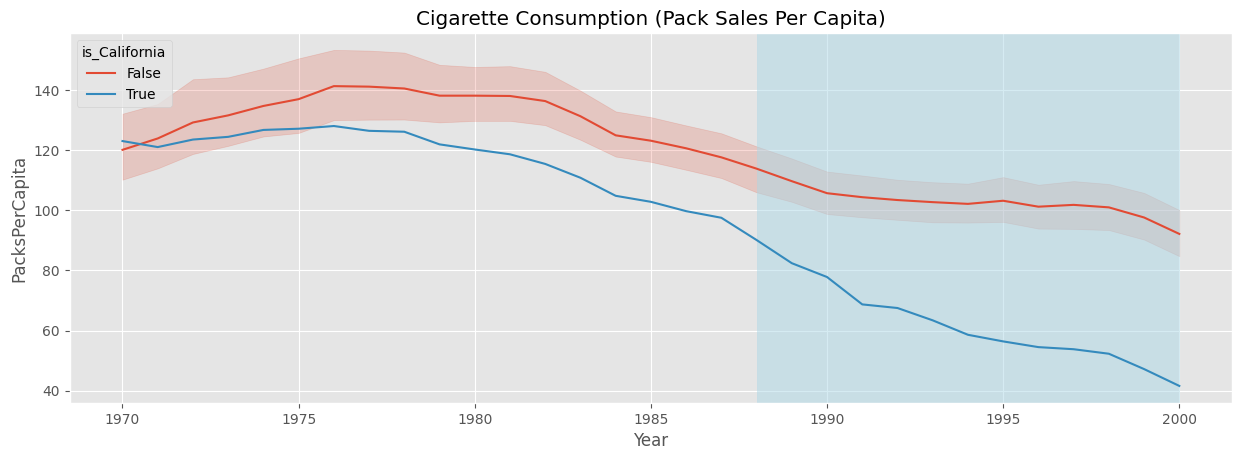

In [62]:
fig, ax = plt.subplots()
fig.set_figwidth(15)

sns.lineplot(x="Year", y="PacksPerCapita", hue="is_California", data=melt_df, ax=ax)

ax.axvspan(1988, 2000, alpha=0.5, color="lightblue")

plt.title("Cigarette Consumption (Pack Sales Per Capita)")
plt.show()

Agora vamos aplicar o estimador diretamente para nossos dados. Em primeiro lugar, rodamos o estimador, carregando os dados, o período pré-intervenção, pós-intervenção e a unidade de tratamento.

In [63]:
sdid = SynthDID(data, PRE_TERM, POST_TERM, TREATMENT)
sdid.fit(zeta_type="base")

#### Difference in Differences - DD

Agora vejamos o resultado para um modelo de Diferenças em Diferenças simples.

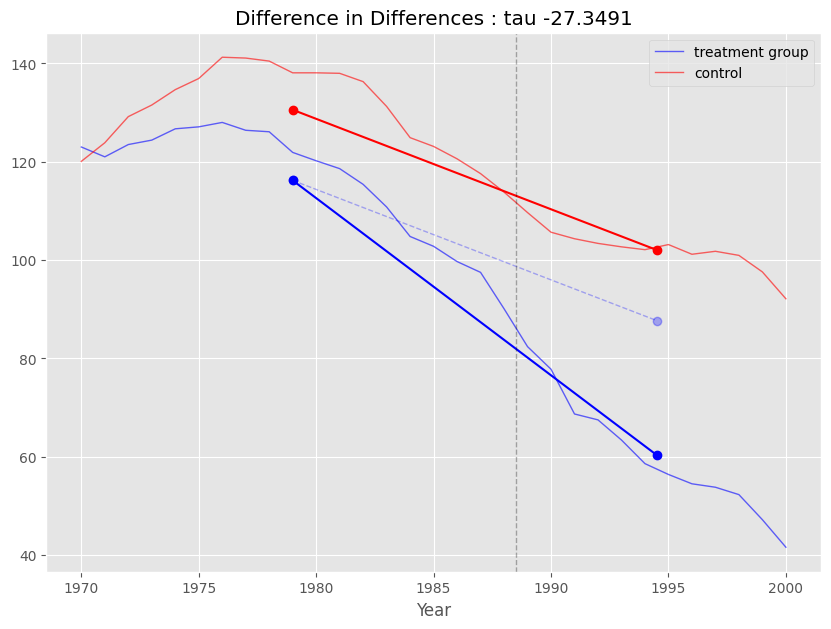

In [64]:
sdid.plot(model="did")

Vamos obter o efeito ATT e seu p-valor associado.

**Atenção que esse cálculo leva tempo**  (coloquei 10 repetições para ir mais rápido, mas o ideal é 50 ou mais)

In [30]:
# Obter o ATT para o modelo DID
att_did = sdid.hat_tau(model='did')

# Calcular placebos manualmente
replications = 10
placebo_effects = []

non_treated_states = [state for state in df['State'].unique() if state not in TREATMENT]

for _ in tqdm(range(replications)):
    for state in non_treated_states:
        try:
            sdid_placebo = SynthDID(data, PRE_TERM, POST_TERM, [state])
            sdid_placebo.fit()
            placebo_effects.append(sdid_placebo.hat_tau(model='did'))
        except Exception as e:
            print(f"Erro ao calcular o placebo para o estado {state}: {e}")

placebo_effects = np.array(placebo_effects)

# Calcular o valor p
p_value_did = (np.sum(np.abs(placebo_effects) >= np.abs(att_did)) + 1) / (len(placebo_effects) + 1)

# Exibir o ATT e o valor p
print(f"ATT_DID: {att_did}")
print(f"P-valor: {p_value_did}")

100%|██████████| 10/10 [13:12<00:00, 79.23s/it]

ATT_DID: -27.34911108361495
P-valor: 0.10761154855643044


#### Synthetic Control Method - SCM ("sc")

Agora vamos verificar os resultados para o modelo de Controle Sintético (Synthetic Control Method - "sc").

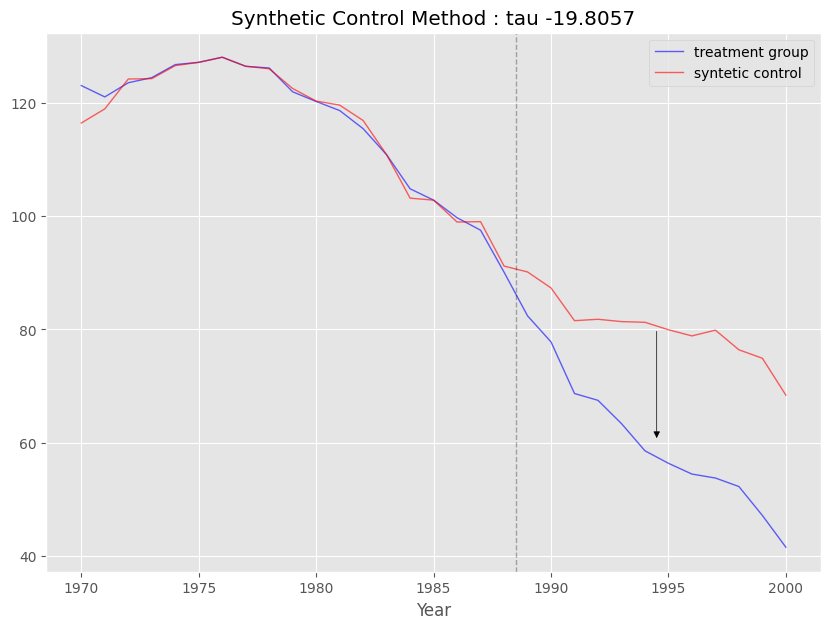

In [65]:
sdid.plot(model="sc")

É interessante termos uma tabela com todos os indivíduos da amostra, com os pesos atribuídos a cada um deles.

In [66]:
# Estimar os pesos usando o modelo de Controle Sintético (SC)
omega = sdid.est_omega_ADH(sdid.Y_pre_c, sdid.Y_pre_t)

# Preparar a tabela de pesos
control_units = data.columns[data.columns != 'California']
weights_df = pd.DataFrame({
    'State': control_units,
    'Synthetic Control Weight': omega.flatten()
})

# Arredondar os pesos para 4 casas decimais
weights_df['Synthetic Control Weight'] = weights_df['Synthetic Control Weight'].round(4)

# Mostrar a tabela de pesos
print(weights_df)

             State  Synthetic Control Weight
0          Alabama                    0.0000
1         Arkansas                    0.0000
2         Colorado                    0.0233
3      Connecticut                    0.0659
4         Delaware                    0.0000
5          Georgia                    0.0000
6            Idaho                    0.0000
7         Illinois                    0.0000
8          Indiana                    0.0000
9             Iowa                    0.0000
10          Kansas                    0.0000
11        Kentucky                    0.0000
12       Louisiana                    0.0000
13           Maine                    0.0000
14       Minnesota                    0.0000
15     Mississippi                    0.0000
16        Missouri                    0.0000
17         Montana                    0.3328
18        Nebraska                    0.0000
19          Nevada                    0.2218
20   New Hampshire                    0.0161
21      Ne

In [67]:
# Estimar os pesos usando o modelo de Controle Sintético (SC)
omega = sdid.est_omega_ADH(sdid.Y_pre_c, sdid.Y_pre_t)

# Preparar a tabela de pesos
control_units = data.columns[data.columns != 'California']
weights_df = pd.DataFrame({
    'State': control_units,
    'Synthetic Control Weight': omega.flatten()
})

# Arredondar os pesos para 4 casas decimais
weights_df['Synthetic Control Weight'] = weights_df['Synthetic Control Weight']

# Mostrar a tabela de pesos
print(weights_df)

             State  Synthetic Control Weight
0          Alabama              0.000000e+00
1         Arkansas              5.893366e-15
2         Colorado              2.333249e-02
3      Connecticut              6.592067e-02
4         Delaware              5.407732e-14
5          Georgia              1.295852e-14
6            Idaho              0.000000e+00
7         Illinois              1.985157e-14
8          Indiana              4.625108e-15
9             Iowa              0.000000e+00
10          Kansas              9.723301e-14
11        Kentucky              0.000000e+00
12       Louisiana              0.000000e+00
13           Maine              7.199353e-15
14       Minnesota              0.000000e+00
15     Mississippi              0.000000e+00
16        Missouri              0.000000e+00
17         Montana              3.327872e-01
18        Nebraska              1.548379e-14
19          Nevada              2.217777e-01
20   New Hampshire              1.606715e-02
21      Ne

É possível fazer uma análise gráfica.

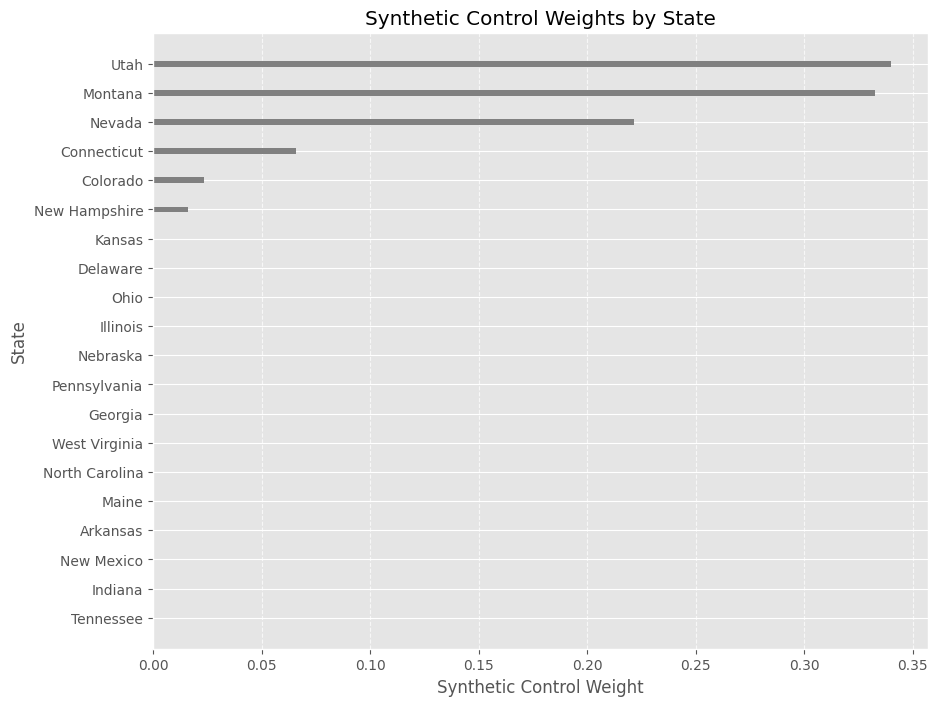

In [68]:
# Estimar os pesos usando o modelo de Controle Sintético (SC)
omega = sdid.est_omega_ADH(sdid.Y_pre_c, sdid.Y_pre_t)

# Preparar a tabela de pesos
control_units = data.columns[data.columns != 'California']
weights_df = pd.DataFrame({
    'State': control_units,
    'Synthetic Control Weight': omega.flatten()
})

# Filtrar as unidades de controle com pesos positivos
positive_weights_df = weights_df[weights_df['Synthetic Control Weight'] > 0]

# Ordenar por pesos para uma visualização melhor
positive_weights_df = positive_weights_df.sort_values(by='Synthetic Control Weight', ascending=True)

# Plotar o gráfico de barras
plt.figure(figsize=(10, 8))
plt.barh(positive_weights_df['State'], positive_weights_df['Synthetic Control Weight'], color='grey', height=0.2)
plt.xlabel('Synthetic Control Weight')
plt.ylabel('State')
plt.title('Synthetic Control Weights by State')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

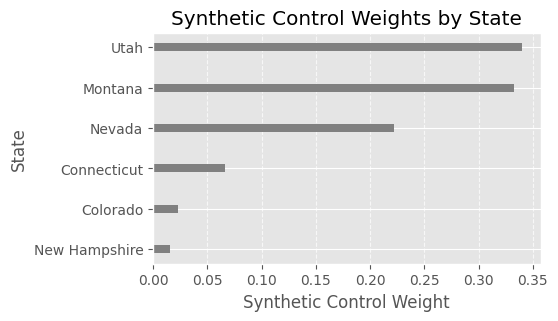

In [69]:
# Estimar os pesos usando o modelo de Controle Sintético (SC)
omega = sdid.est_omega_ADH(sdid.Y_pre_c, sdid.Y_pre_t)

# Preparar a tabela de pesos
control_units = data.columns[data.columns != 'California']
weights_df = pd.DataFrame({
    'State': control_units,
    'Synthetic Control Weight': omega.flatten()
})

# Filtrar as unidades de controle com pesos positivos
positive_weights_df = weights_df[weights_df['Synthetic Control Weight'] > 0.01]

# Ordenar por pesos para uma visualização melhor
positive_weights_df = positive_weights_df.sort_values(by='Synthetic Control Weight', ascending=True)

# Plotar o gráfico de barras
plt.figure(figsize=(5, 3))
plt.barh(positive_weights_df['State'], positive_weights_df['Synthetic Control Weight'], color='grey', height=0.2)
plt.xlabel('Synthetic Control Weight')
plt.ylabel('State')
plt.title('Synthetic Control Weights by State')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

Podemos fazer uma tabela comparando a Califórnia Real com a Sintética, e com a média geral do "donor pool".

In [70]:
# Obter os pesos usando o modelo de Controle Sintético (SC)
omega = sdid.est_omega_ADH(sdid.Y_pre_c, sdid.Y_pre_t)
control_units = data.columns[data.columns != 'California']
W = omega.flatten()

# Calcular os preditores para cada ano do período pré-intervenção
years_pre = list(range(PRE_TERM[0], PRE_TERM[1] + 1))
real_california = data['California'].loc[years_pre]
synthetic_california = data[control_units].loc[years_pre].dot(W)
average_controls = data.loc[years_pre].mean(axis=1)

# Criar a tabela comparativa com valores formatados
table = pd.DataFrame({
    'Year': years_pre,
    'Real California': [f"{x:.2f}" for x in real_california.values],
    'Synthetic California': [f"{x:.2f}" for x in synthetic_california.values],
    'Average of Controls': [f"{x:.2f}" for x in average_controls.values]
})

print("Table 1: Cigarette sales predictor means (Pre-intervention period) \n")
print(table)

Table 1: Cigarette sales predictor means (Pre-intervention period) 

    Year Real California Synthetic California Average of Controls
0   1970          123.00               116.40              120.16
1   1971          121.00               118.89              123.79
2   1972          123.50               124.16              129.03
3   1973          124.40               124.22              131.36
4   1974          126.70               126.52              134.46
5   1975          127.10               127.10              136.68
6   1976          128.00               128.00              140.92
7   1977          126.40               126.40              140.71
8   1978          126.10               125.97              140.11
9   1979          121.90               122.49              137.67
10  1980          120.20               120.27              137.63
11  1981          118.60               119.55              137.49
12  1982          115.40               116.84              135.76
13  198

Conforme visto no artigo do Abadie, é possivel verificar o efeito do tratamento para a Califórnia ao comparar a trajetória da California Real com sua sintética.

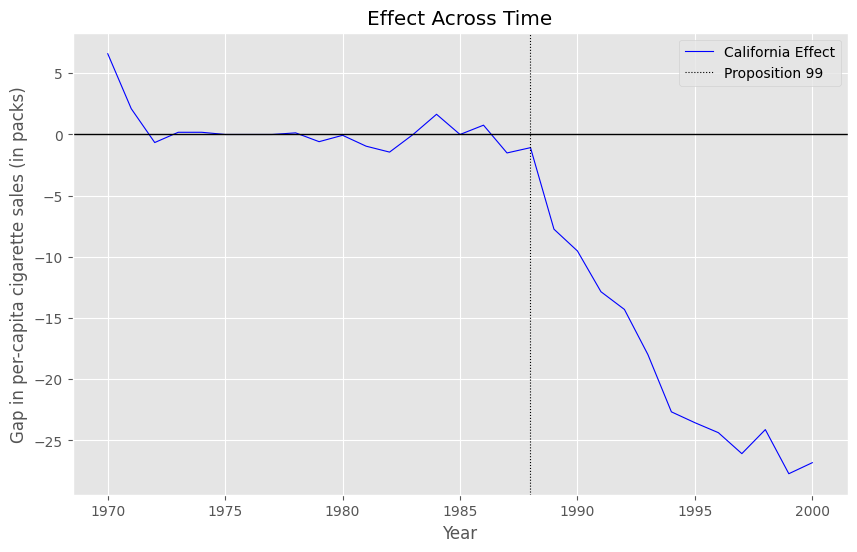

In [71]:
# Obter as trajetórias reais e sintéticas para o modelo "sc"
real_trajectory = sdid.target_y().values
synthetic_trajectory = sdid.sc_potentical_outcome().values

# Calcular a diferença
difference = real_trajectory - synthetic_trajectory

# Plotar a diferença
plt.figure(figsize=(10, 6))
years = np.arange(PRE_TERM[0], POST_TERM[1] + 1)
plt.plot(years, difference, label="California Effect", color='blue', linewidth=0.8)
plt.axvline(x=1988, color='black', linestyle=":", lw=0.8, label="Proposition 99")
plt.axhline(y=0, color='black', lw=1)
plt.title("Effect Across Time")
plt.ylabel("Gap in per-capita cigarette sales (in packs)")
plt.xlabel("Year")
plt.legend()
plt.show()

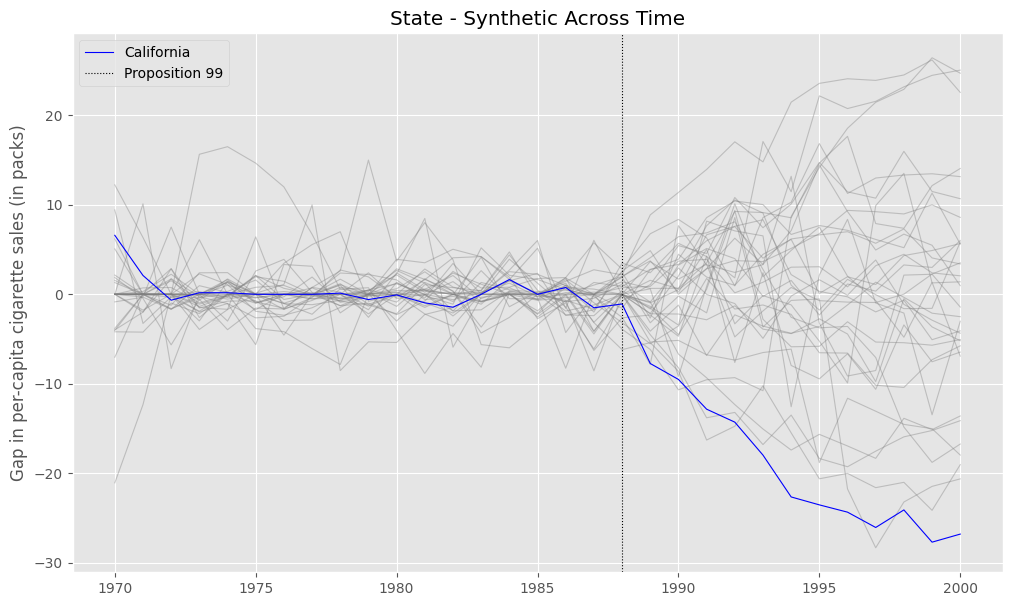

In [77]:
# Obter lista de estados não tratados
non_treated_states = [state for state in df['State'].unique() if state not in TREATMENT]

# Calcular as diferenças para todos os estados não tratados
differences = {}
for state in non_treated_states:
    try:
        sdid_state = SynthDID(data, PRE_TERM, POST_TERM, [state])
        sdid_state.fit()
        real_trajectory = sdid_state.target_y().values
        synthetic_trajectory = sdid_state.sc_potentical_outcome().values
        difference = real_trajectory - synthetic_trajectory
        differences[state] = difference
    except KeyError:
        print(f"Erro ao processar o estado: {state}")

# Calcular o desvio padrão das diferenças
all_differences = np.array(list(differences.values()))
std_dev = np.std(all_differences, axis=0)

# Plotar as trajetórias dos placebos, excluindo aqueles com mais de dois desvios padrão
plt.figure(figsize=(12, 7))
years = np.arange(PRE_TERM[0], POST_TERM[1] + 1)
for state, difference in differences.items():
    if np.all(np.abs(difference) <= 2 * std_dev):
        plt.plot(years, difference, color="gray", alpha=0.4, linewidth=0.8)

# Plotar a diferença para a Califórnia
real_trajectory_ca = sdid.target_y().values
synthetic_trajectory_ca = sdid.sc_potentical_outcome().values
difference_ca = real_trajectory_ca - synthetic_trajectory_ca
plt.plot(years, difference_ca, label="California", color='blue', linewidth=0.8)

# Adicionar linhas verticais e horizontais
plt.axvline(x=1988, ymin=-50, ymax=120, color='black', linestyle=":", lw=0.8, label="Proposition 99")
plt.axhline(y=0, xmin=1970, xmax=2000, color='black', lw=3)
plt.ylabel("Gap in per-capita cigarette sales (in packs)")
plt.title("State - Synthetic Across Time")
plt.legend()
plt.show()

Agora vamos obter o p-valor para o efeito do tratamento baseado nos placebos.

In [40]:
# Calcular as diferenças para todos os estados não tratados
differences = {}
non_treated_states = [state for state in df['State'].unique() if state not in TREATMENT]

for state in non_treated_states:
    try:
        sdid_state = SynthDID(data, PRE_TERM, POST_TERM, [state])
        sdid_state.fit()
        real_trajectory = sdid_state.target_y().values
        synthetic_trajectory = sdid_state.sc_potentical_outcome().values
        difference = real_trajectory - synthetic_trajectory
        differences[state] = difference
    except KeyError:
        print(f"Erro ao processar o estado: {state}")

# Obter o ATT para a Califórnia
att = sdid.hat_tau(model='sc')

# Calcular os valores médios dos placebos no período pós-tratamento
placebo_effects = np.array([np.mean(diff[POST_TERM[0] - PRE_TERM[0]:]) for diff in differences.values()])

# Calcular o p-valor
p_value = (np.sum(np.abs(placebo_effects) >= np.abs(att)) + 1) / (len(placebo_effects) + 1)

# Exibir o ATT e o p-valor
print(f"ATT_SC: {att}")
print(f"P-value: {p_value}")

ATT_SC: -19.805718046973006
P-value: 0.05128205128205128


Vamos verificar o quão extremo é o efeito do tratamento a partir da ideia da razão Post-treatment MSPE/Pre-treatment MSPE.

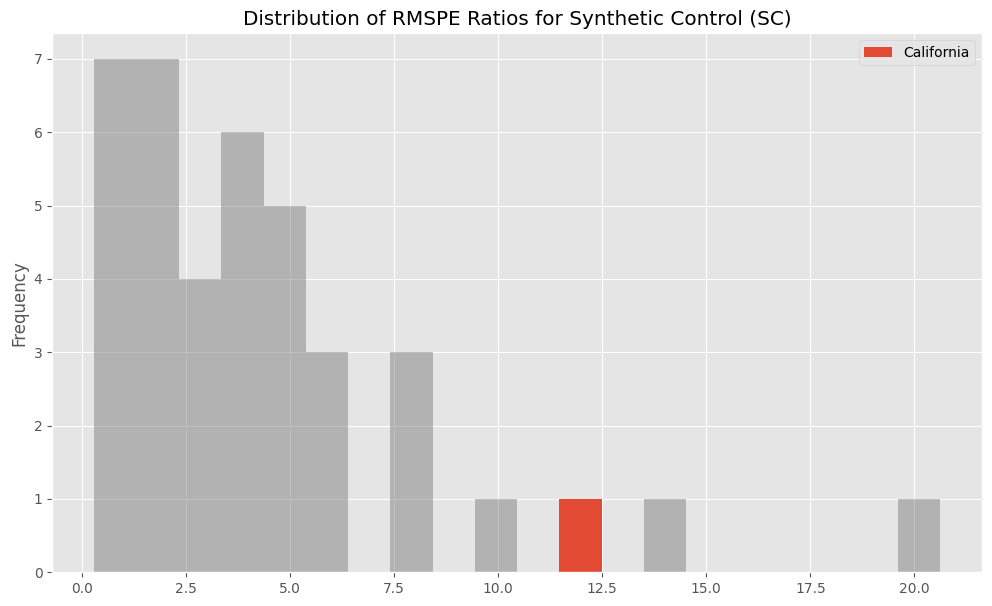

In [18]:
# Função para calcular a razão RMSPE pós-tratamento sobre RMSPE pré-tratamento
def calculate_rmspe_ratio(state):
    sdid_state = SynthDID(data, PRE_TERM, POST_TERM, [state])
    sdid_state.fit()
    pre_period = sdid_state.Y_pre_t.values.flatten() - sdid_state.sc_potentical_outcome().loc[PRE_TERM[0]:PRE_TERM[1]].values.flatten()
    post_period = sdid_state.Y_post_t.values.flatten() - sdid_state.sc_potentical_outcome().loc[POST_TERM[0]:POST_TERM[1]].values.flatten()
    rmspe_pre = np.sqrt(np.mean(pre_period ** 2))
    rmspe_post = np.sqrt(np.mean(post_period ** 2))
    rmspe_ratio = rmspe_post / rmspe_pre
    return rmspe_ratio

# Calcular a razão RMSPE para a Califórnia
rmspe_ratio_california = calculate_rmspe_ratio('California')

# Definir os estados não tratados
non_treated_states = [state for state in df['State'].unique() if state not in TREATMENT]

# Calcular a razão RMSPE para todas as unidades restantes
rmspe_ratios = []
remaining_states = non_treated_states.copy()
remaining_states.append('California')

for state in remaining_states:
    rmspe_ratio = calculate_rmspe_ratio(state)
    rmspe_ratios.append(rmspe_ratio)

rmspe_ratios = np.array(rmspe_ratios)

# Plotar o histograma dos RMSPE ratios das unidades restantes e destacar o RMSPE ratio para a Califórnia
plt.figure(figsize=(12, 7))
_, bins, _ = plt.hist(rmspe_ratios, bins=20, color="grey", alpha=0.5)
plt.hist([rmspe_ratio_california], bins=bins, color="C0", label="California")
plt.ylabel("Frequency")
plt.title("Distribution of RMSPE Ratios for Synthetic Control (SC)")
plt.legend()
plt.show()

Agora vamos visualizar o efeito em um gráfico do Tipo Event Study

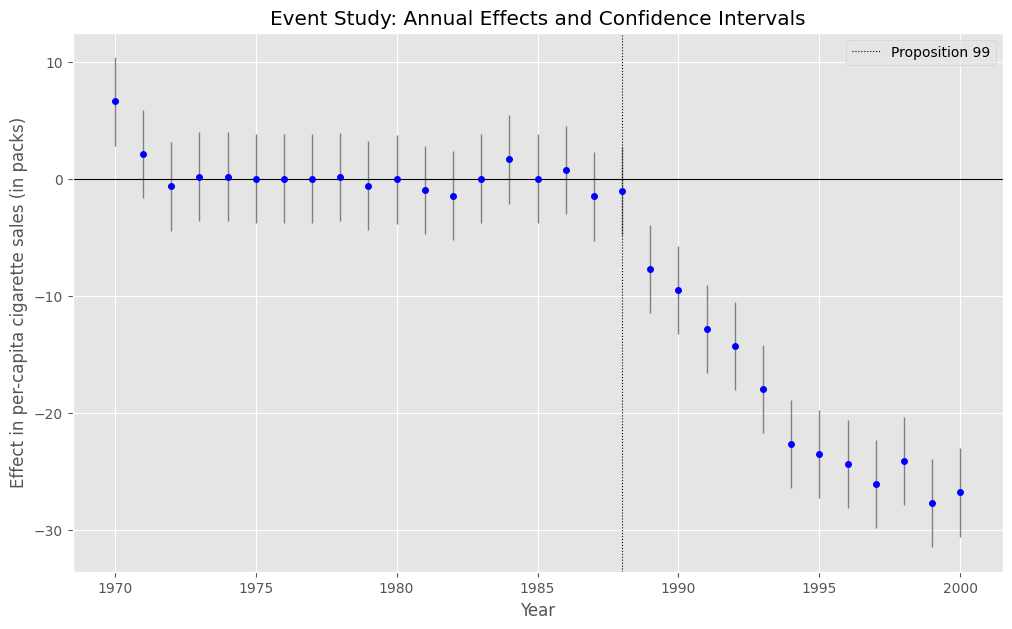

In [72]:
# Obter o efeito anual para cada ano
years = np.arange(PRE_TERM[0], POST_TERM[1] + 1)
effects = []
for year in years:
    att_year = sdid.target_y().loc[year] - sdid.sc_potentical_outcome().loc[year]
    effects.append(att_year)

# Calcular o intervalo de confiança
# Usando um método simplificado para ilustrar, para intervalos de confiança reais, técnicas estatísticas adequadas devem ser usadas.
std_error = np.std(effects) / np.sqrt(len(effects))
conf_interval = 1.96 * std_error  # Para um intervalo de confiança de 95%

# Plotar os efeitos anuais e os intervalos de confiança
plt.figure(figsize=(12, 7))
plt.errorbar(years, effects, yerr=conf_interval, fmt='o', color='blue', ecolor='grey', elinewidth=1, capsize=0, markersize=4)
plt.axvline(x=1988, color='black', linestyle=":", lw=0.8, label="Proposition 99")
plt.axhline(y=0, color='black', lw=0.8)
plt.ylabel("Effect in per-capita cigarette sales (in packs)")
plt.title("Event Study: Annual Effects and Confidence Intervals")
plt.xlabel("Year")
plt.legend()
plt.show()

**REFAZER**
https://matheusfacure.github.io/python-causality-handbook/Conformal-Inference-for-Synthetic-Control.html


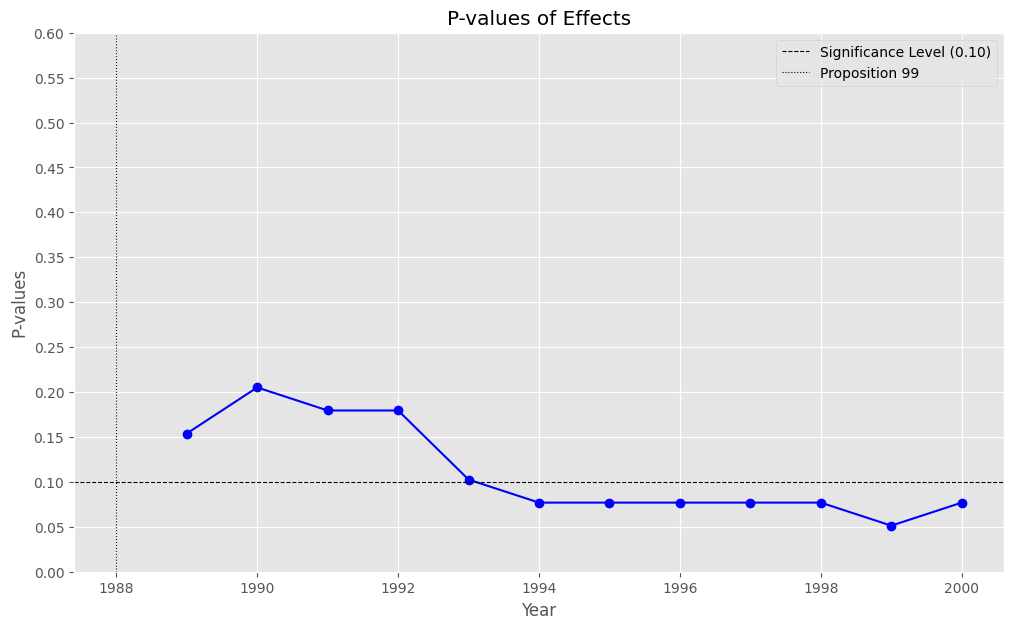

In [89]:
# Calcular p-valores anuais a partir de 1989
years_post_treatment = np.arange(POST_TERM[0], POST_TERM[1] + 1)
p_values = []
for year in years_post_treatment:
    att_year = sdid.target_y().loc[year] - sdid.sc_potentical_outcome().loc[year]
    placebo_years = [diff[year - PRE_TERM[0]] for diff in differences.values()]
    p_value_year = (np.sum(np.abs(placebo_years) >= np.abs(att_year)) + 1) / (len(placebo_years) + 1)
    p_values.append(p_value_year)

# Plotar os p-valores anuais com a escala desejada
plt.figure(figsize=(12, 7))
plt.plot(years_post_treatment, p_values, marker='o', linestyle='-', color='blue')
plt.axhline(y=0.10, color='black', linestyle="--", lw=0.8, label="Significance Level (0.10)")
plt.axvline(x=1988, color='black', linestyle=":", lw=0.8, label="Proposition 99")
plt.ylabel("P-values")
plt.title("P-values of Effects")
plt.xlabel("Year")
plt.yticks(np.arange(0.00, 0.65, 0.05))  # Define a escala de 0.05 a 0.50 com incrementos de 0.05
plt.legend()
plt.show()

### Leave One Out

Um teste de robustez comum para o SCM é o Leave One Out. A ideia é remover uma unidade de controle por vez e verificar se o efeito do tratamento é robusto.

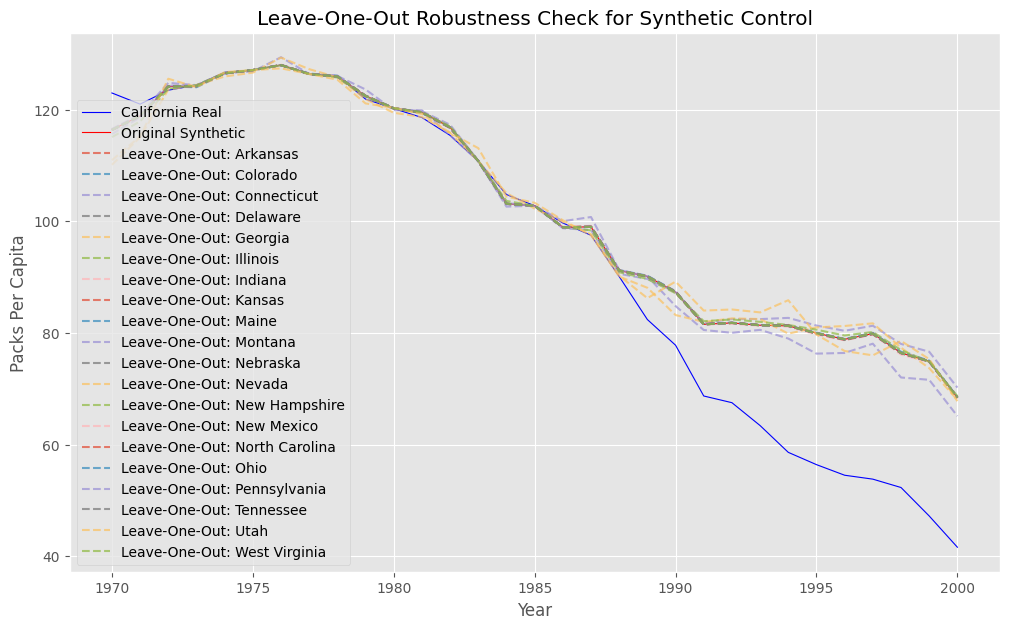

Unidades de controle com pesos positivos:
['Arkansas', 'Colorado', 'Connecticut', 'Delaware', 'Georgia', 'Illinois', 'Indiana', 'Kansas', 'Maine', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Mexico', 'North Carolina', 'Ohio', 'Pennsylvania', 'Tennessee', 'Utah', 'West Virginia']


In [42]:
# Estimar os pesos usando o modelo de Controle Sintético (SC)
omega = sdid.est_omega_ADH(sdid.Y_pre_c, sdid.Y_pre_t)
control_units = data.columns[data.columns != 'California']
weights_df = pd.DataFrame({
    'Indivíduos': control_units,
    'Pesos': omega.flatten()
})

# Filtrar as unidades de controle com pesos positivos
positive_weight_units = weights_df[weights_df['Pesos'] > 0]['Indivíduos'].tolist()

# Calcular o contrafactual original para a Califórnia
original_synthetic_trajectory = sdid.sc_potentical_outcome().values.flatten()

# Inicializar um dicionário para armazenar as trajetórias leave-one-out
loo_trajectories = {}

# Calcular as trajetórias leave-one-out
for state in positive_weight_units:
    # Remover a unidade de controle atual
    loo_control_units = [unit for unit in positive_weight_units if unit != state]
    
    # Ajustar o modelo sem a unidade de controle atual
    data_loo = data.drop(columns=[state])
    sdid_loo = SynthDID(data_loo, PRE_TERM, POST_TERM, TREATMENT)
    sdid_loo.fit()
    
    # Calcular o contrafactual sem a unidade de controle atual
    loo_synthetic_trajectory = sdid_loo.sc_potentical_outcome().values.flatten()
    
    # Armazenar a trajetória resultante
    loo_trajectories[state] = loo_synthetic_trajectory

# Plotar as trajetórias leave-one-out contra o contrafactual original e a Califórnia real
plt.figure(figsize=(12, 7))
plt.plot(data.index, data['California'], label='California Real', color='blue', linewidth=0.8)
plt.plot(data.index, original_synthetic_trajectory, label='Original Synthetic', color='red', linewidth=0.8)

for state, trajectory in loo_trajectories.items():
    plt.plot(data.index, trajectory, label=f'Leave-One-Out: {state}', linestyle='--', alpha=0.7)

plt.xlabel('Year')
plt.ylabel('Packs Per Capita')
plt.title('Leave-One-Out Robustness Check for Synthetic Control')
plt.legend()
plt.show()

# Mostrar as unidades de controle com pesos positivos
print("Unidades de controle com pesos positivos:")
print(positive_weight_units)

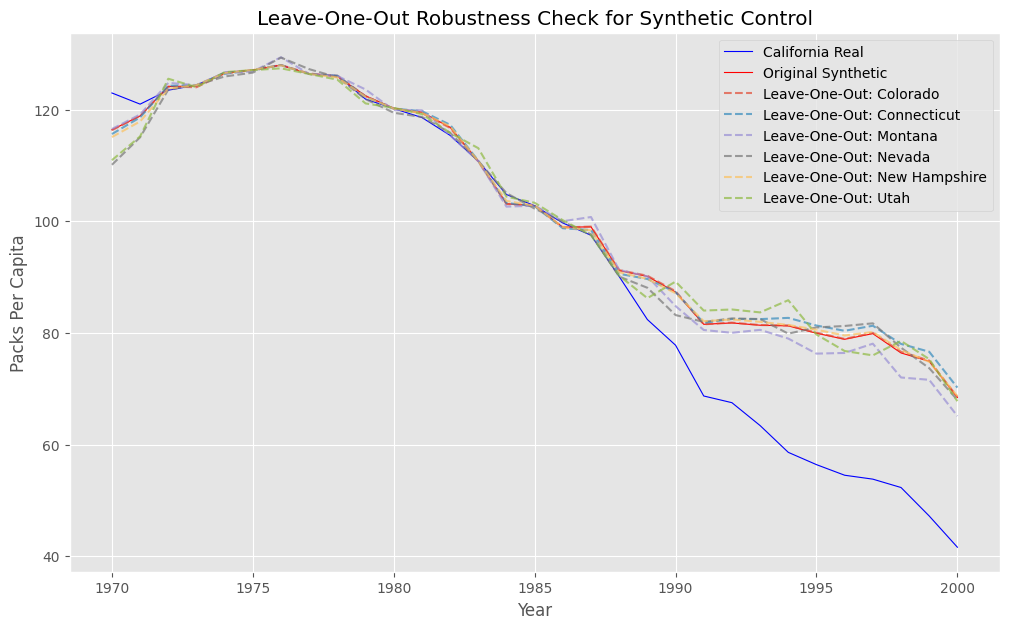

Unidades de controle com pesos positivos e maiores que 0.01:
['Colorado', 'Connecticut', 'Montana', 'Nevada', 'New Hampshire', 'Utah']


In [43]:
# Estimar os pesos usando o modelo de Controle Sintético (SC)
omega = sdid.est_omega_ADH(sdid.Y_pre_c, sdid.Y_pre_t)
control_units = data.columns[data.columns != 'California']
weights_df = pd.DataFrame({
    'Indivíduos': control_units,
    'Pesos': omega.flatten()
})

# Filtrar as unidades de controle com pesos positivos e maiores que 0.05
positive_weight_units = weights_df[weights_df['Pesos'] > 0.01]['Indivíduos'].tolist()

# Calcular o contrafactual original para a Califórnia
original_synthetic_trajectory = sdid.sc_potentical_outcome().values.flatten()

# Inicializar um dicionário para armazenar as trajetórias leave-one-out
loo_trajectories = {}

# Calcular as trajetórias leave-one-out
for state in positive_weight_units:
    # Remover a unidade de controle atual
    loo_control_units = [unit for unit in positive_weight_units if unit != state]
    
    # Ajustar o modelo sem a unidade de controle atual
    data_loo = data.drop(columns=[state])
    sdid_loo = SynthDID(data_loo, PRE_TERM, POST_TERM, TREATMENT)
    sdid_loo.fit()
    
    # Calcular o contrafactual sem a unidade de controle atual
    loo_synthetic_trajectory = sdid_loo.sc_potentical_outcome().values.flatten()
    
    # Armazenar a trajetória resultante
    loo_trajectories[state] = loo_synthetic_trajectory

# Plotar as trajetórias leave-one-out contra o contrafactual original e a Califórnia real
plt.figure(figsize=(12, 7))
plt.plot(data.index, data['California'], label='California Real', color='blue', linewidth=0.8)
plt.plot(data.index, original_synthetic_trajectory, label='Original Synthetic', color='red', linewidth=0.8)

for state, trajectory in loo_trajectories.items():
    plt.plot(data.index, trajectory, label=f'Leave-One-Out: {state}', linestyle='--', alpha=0.7)

plt.xlabel('Year')
plt.ylabel('Packs Per Capita')
plt.title('Leave-One-Out Robustness Check for Synthetic Control')
plt.legend()
plt.show()

# Mostrar as unidades de controle com pesos positivos e maiores que 0.05
print("Unidades de controle com pesos positivos e maiores que 0.01:")
print(positive_weight_units)

#### Synthetic Difference in Differences - SDD ("sdid")

Este método combina os atributos do DD e SCM. Vejamos como se dá a aplicação.

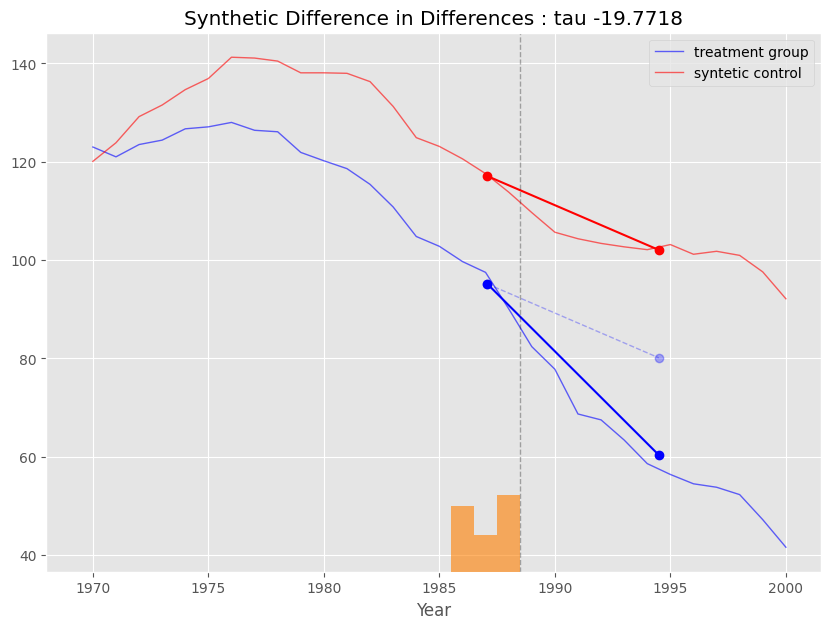

In [44]:
sdid.plot(model="sdid")

Vamos obter o valor do ATT para o SDiD, e o p-valor para o efeito do tratamento baseado nos placebos.

**Atenção, porque este procedimento leva tempo.** (diminui para 10 repetições para ir mais rápido, mas o ideal é 50 ou mais)

In [45]:
# Obter o ATT para o modelo SDID
att_sdid = sdid.hat_tau(model='sdid')

# Calcular placebos manualmente
replications = 10
placebo_effects = []

non_treated_states = [state for state in df['State'].unique() if state not in TREATMENT]

for _ in tqdm(range(replications)):
    for state in non_treated_states:
        try:
            sdid_placebo = SynthDID(data, PRE_TERM, POST_TERM, [state])
            sdid_placebo.fit()
            placebo_effects.append(sdid_placebo.hat_tau(model='sdid'))
        except Exception as e:
            print(f"Erro ao calcular o placebo para o estado {state}: {e}")

placebo_effects = np.array(placebo_effects)

# Calcular o p-valor
p_value_sdid = (np.sum(np.abs(placebo_effects) >= np.abs(att_sdid)) + 1) / (len(placebo_effects) + 1)

# Exibir o ATT e o p-valor
print(f"ATT_SDID: {att_sdid}")
print(f"P-valor: {p_value_sdid}")

100%|██████████| 10/10 [12:57<00:00, 77.78s/it]

ATT_SDID: -19.771822808164565
P-valor: 0.028871391076115485


Agora vamos montar uma tabela com os efeitos encontrados para cada método (DID, SCM e SDID).

In [46]:
# Criar a tabela de resultados
results_df = pd.DataFrame({
    'Model': ['DID', 'SC', 'SDID'],
    'ATT': [att_did, att, att_sdid],
    'P-value': [p_value_did, p_value, p_value_sdid]
})
# Arredondar os valores para 4 casas decimais
results_df = results_df.round(4)
# Mostrar a tabela de resultados
print(results_df)

  Model      ATT  P-value
0   DID -27.3491   0.1076
1    SC -19.8057   0.0513
2  SDID -19.7718   0.0289


### Adicionando Covariáveis

É possivel encontrarmos os resultados com covariáveis. Mas lembre que no contexto de SCM, as covariáveis servem como fonte de informação para melhor ponderar os pesos a serem atribuídos à variável de resultado de cada unidade no "donnor pool".

In [47]:
import warnings
warnings.filterwarnings("ignore")
import sys
import os
sys.path.append(os.path.abspath("../"))
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
from tqdm import tqdm
from synthdid.model import SynthDID

In [48]:
raw_df = pd.read_csv("https://raw.githubusercontent.com/matheusfacure/python-causality-handbook/master/causal-inference-for-the-brave-and-true/data/smoking.csv")
raw_df.head()

,state,year,cigsale,lnincome,beer,age15to24,retprice,california,after_treatment
0,1,1970,89.800003,NaN,NaN,0.178862,39.599998,False,False
1,1,1971,95.400002,NaN,NaN,0.179928,42.700001,False,False
2,1,1972,101.099998,9.498476,NaN,0.180994,42.299999,False,False
3,1,1973,102.900002,9.550107,NaN,0.182060,42.099998,False,False
4,1,1974,108.199997,9.537163,NaN,0.183126,43.099998,False,False


In [49]:
df= raw_df.pivot(index='state', columns="year")["cigsale"].T
df.head()

state,1,2,3,4,5,6,7,8,9,10,...,30,31,32,33,34,35,36,37,38,39
year,,,,,,,,,,,,,,,,,,,,,
1970,89.800003,100.300003,123.000000,124.800003,120.000000,155.000000,109.900002,102.400002,124.800003,134.600006,...,103.599998,92.699997,99.800003,106.400002,65.500000,122.599998,124.300003,114.500000,106.400002,132.199997
1971,95.400002,104.099998,121.000000,125.500000,117.599998,161.100006,115.699997,108.500000,125.599998,139.300003,...,115.000000,96.699997,106.300003,108.900002,67.699997,124.400002,128.399994,111.500000,105.400002,131.699997
1972,101.099998,103.900002,123.500000,134.300003,110.800003,156.300003,117.000000,126.099998,126.599998,149.199997,...,118.699997,103.000000,111.500000,108.599998,71.300003,138.000000,137.000000,117.500000,108.800003,140.000000
1973,102.900002,108.000000,124.400002,137.899994,109.300003,154.699997,119.800003,121.800003,124.400002,156.000000,...,125.500000,103.500000,109.699997,110.400002,72.699997,146.800003,143.100006,116.599998,109.500000,141.199997
1974,108.199997,109.699997,126.699997,132.800003,112.400002,151.300003,123.699997,125.599998,131.899994,159.600006,...,129.699997,108.400002,114.800003,114.699997,75.599998,151.800003,149.600006,119.900002,111.800003,145.800003


In [50]:
PRE_TEREM = [1970, 1988]
POST_TEREM = [1989, 2000]
TREATMENT = [3] #"California"
sdid = SynthDID(df, PRE_TEREM, POST_TEREM, TREATMENT)
sdid.fit(zeta_type="base")

Vamos começar a análise para o Synthetic Control Method - SCM.

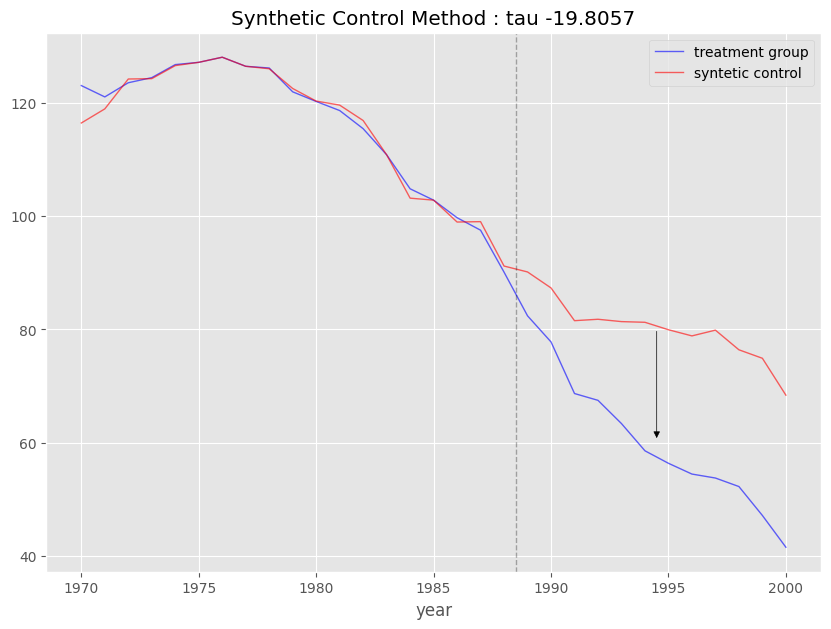

In [51]:
hat_omega_simple = sdid.estimated_params(model="sc")
sdid.plot(model="sc")

Agora vamos criar as médias das variáveis de controle para utilizar como ponderação para o modelo, e adicionar ao data-frame, nas primeiras 3 linhas.

In [ ]:
# features = ["retprice", "age15to24", "lnincome"]
# additional_df = (
#     raw_df.query("year <= 1988").pivot(index="state", columns="year")[features].T
# )
# additional_df.head()
# additional_df = additional_df.dropna()

In [52]:
# Vamos utilizar as médias para reduzir o tempo computacional.
features = ["retprice", "age15to24", "lnincome"]
additional_df = pd.concat(
    [
        raw_df.query("year <= 1988").groupby("state")[features].mean().T,
        pd.DataFrame(np.log(df.loc[1988] / df.loc[1970])).T,
        pd.DataFrame(df.query("year <= 1988").diff().mean()).T,
    ]
)
additional_df

state,1,2,3,4,5,6,7,8,9,10,...,30,31,32,33,34,35,36,37,38,39
retprice,66.994737,67.689473,66.636843,60.394737,77.368420,67.900000,63.594737,62.389474,66.868421,58.473684,...,56.831579,64.973684,64.647368,70.210527,64.178947,64.931579,53.784211,67.926316,69.878948,59.378948
age15to24,0.179464,0.169168,0.178662,0.184432,0.167361,0.181654,0.183468,0.160952,0.173347,0.179288,...,0.193207,0.180564,0.176556,0.183357,0.195291,0.182393,0.184799,0.170184,0.179282,0.180458
lnincome,9.632306,9.606481,10.031759,9.929731,10.105631,9.950567,9.752860,9.716291,9.988937,9.816424,...,9.625621,9.704052,9.688795,9.838702,9.662891,9.760267,9.884459,9.636039,9.852031,9.903308
0,0.221806,0.191749,-0.311264,-0.277055,-0.135438,-0.122714,0.121517,-0.192135,-0.148292,-0.004468,...,0.182965,-0.008667,0.227543,-0.097663,-0.174717,0.048557,0.040983,-0.048310,-0.036368,-0.145489
0,1.238889,1.177778,-1.827778,-1.677778,-0.844444,-0.994444,0.788889,-0.994445,-0.955556,-0.033334,...,1.155556,-0.044444,1.416667,-0.550000,-0.583333,0.338889,0.288889,-0.300000,-0.211111,-0.994444


Agora vamos retirar o estado tratado do data-frame para utilizar apenas as covariáveis de controle em additional_X, e colocá-la em additional_y.

In [53]:
# Este comando remove a coluna que corresponde à unidade de tratamento (neste caso, o estado da Califórnia, que tem o índice 3) do DataFrame additional_df.
additional_X = additional_df.drop(columns=3, axis=0)

#ste comando seleciona a coluna que corresponde à unidade de tratamento (neste caso, o estado da Califórnia, que tem o índice 3) do DataFrame additional_df e a armazena em additional_y.
additional_y = additional_df[3]

Agora vamos carregar novamente o modelo com as covariáveis indicadas em fit(). E rodar novamente.

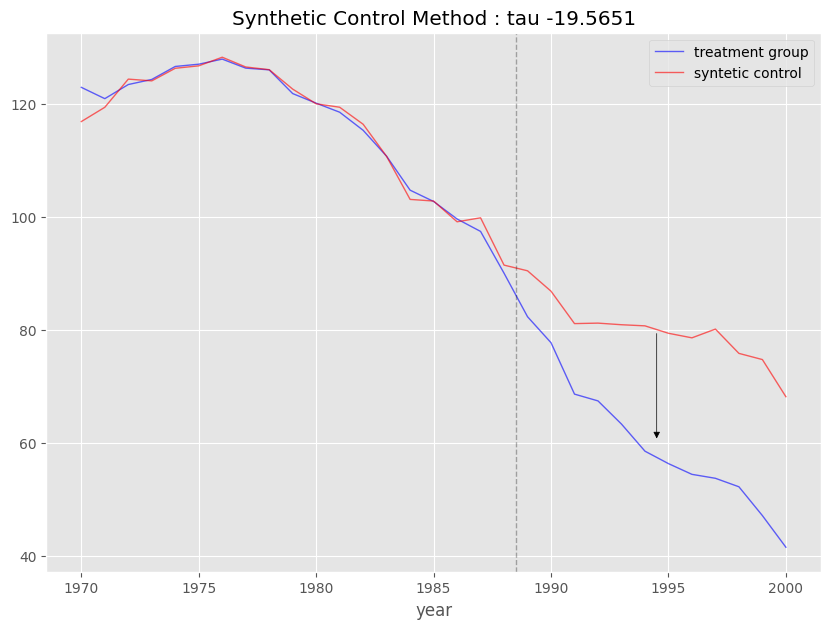

In [54]:
sdid.fit(zeta_type="base", additional_X=additional_X, additional_y=additional_y )
hat_omega_classic = sdid.estimated_params(model="sc")
sdid.plot(model="sc")

In [55]:
omega_result = pd.merge(
    hat_omega_simple.rename(columns={"sc_weight": "simple_weight"}),
    hat_omega_classic.rename(columns={"sc_weight": "classic_weight"}),
    on="features",
    how="left",
)
omega_result.sum()

features          777.000
simple_weight       1.000
classic_weight      0.999
dtype: float64

In [56]:
pre_mean = (
    raw_df.query("year <= 1988").groupby("state")[features + ["cigsale"]].mean().T
)
pre_mean_c = pre_mean.drop(columns=3)
pre_mean_t = pre_mean[3]


In [57]:
pre_mean_result = pd.DataFrame(pre_mean_t)
pre_mean_result.columns = ["California"]

Vamos montar uma tabela comparando as médias das variáveis de controle para a Califórnia Real, a média geral do "donor pool", e a Sintética.

In [58]:
pre_mean_result["naive_control_mean"] = pre_mean_c.T.mean()
pre_mean_result["simple_sc"] = pre_mean_c @ omega_result["simple_weight"].values
pre_mean_result["classic_sc"] = pre_mean_c @ omega_result["classic_weight"].values

pre_mean_result

,California,naive_control_mean,simple_sc,classic_sc
retprice,66.636843,64.504571,65.525479,65.818963
age15to24,0.178662,0.178345,0.179606,0.180128
lnincome,10.031759,9.792332,9.807221,9.799112
cigsale,116.210526,130.569529,115.936979,115.941289


Podemos estimar o DD, e o SDD considerando as covariáveis.

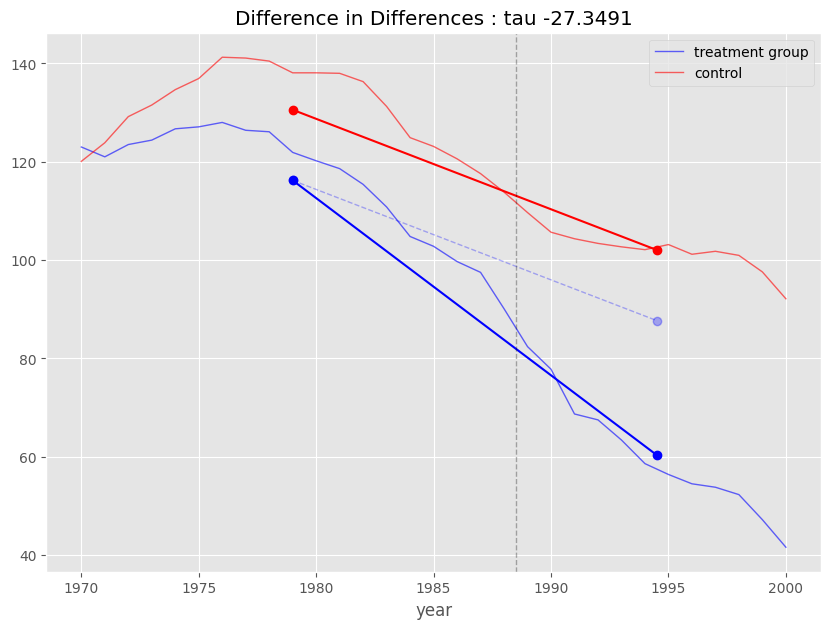

In [59]:
sdid.fit(zeta_type="base", additional_X=additional_X, additional_y=additional_y )
sdid.plot(model="did")

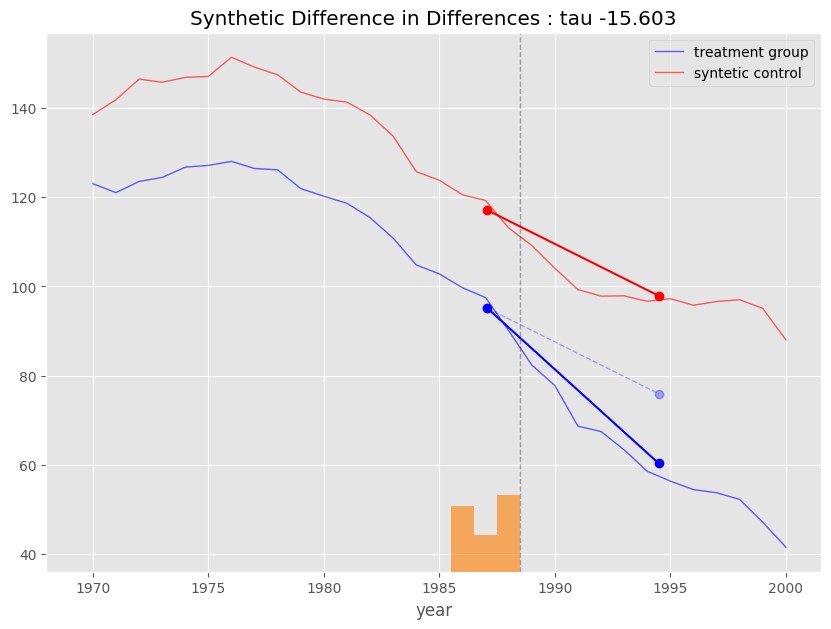

In [60]:
sdid.fit(zeta_type="base", additional_X=additional_X, additional_y=additional_y )
sdid.plot(model="sdid")

## Causal Impact using Bayesian Structural Time-Series Models


Quando tratamos com dados como mercado de ações, cliques, vendas, ou qualquer outra métrica de negócio, é comum que haja variações sazonais e/ou dependência temporal das séries de dados. Além de sua trajetória parecer mais errática. O artigo de **Brodersen et al. (2015)** propõe inferir o impacto causal com base em um **modelo de espaço de estado** de regressão que prevê a resposta contrafactual do mercado em um modelo similar à ideia de controle sintético. 

Nesse cenário, **a variável resposta é uma série temporal**, portanto o efeito causal de interesse é a **diferença entre a série real observada e a série que teria sido observada se a intervenção não tivesse ocorrido**.

Então, em contraste com os métodos tradicionais de diferenças em diferenças, os modelos de espaço de estados permitem:

* (i) inferir a evolução temporal do impacto atribuível, 
* (ii) incorporar antecedentes empíricos nos parâmetros em um tratamento totalmente bayesiano (Incorporação de Conhecimento Prévio, Atualização com Dados Observados, Modelagem de Incerteza, Evitar Overfitting/Spike-and-Slab Priors, etc - Refere-se ao uso completo do framework bayesiano, desde a definição de priors até a atualização das distribuições a posteriori com base nos dados observados.) e 
* (iii) forma flexível acomodar múltiplas fontes de variação, incluindo tendências locais, sazonalidade e a influência variável no tempo de covariáveis ​​contemporâneas. 

Uma primeira estratégia é utilizar a previsão da série estudada contra o efeito após a intervenção. A diferença entre a previsão e o valor observado é o efeito causal.

<div style="text-align:center;">
    <img src="images\CausalImpact02.PNG"  alt="Imagem" style="width: 800px;"/>
</div>

Outra estratégia é utilizar diferentes séries temporais que não tenham sido afetadas pelo tratamento e que possam ajudar a prever a série temporal de interesse. Ou seja, são correlacionadas com nossa série temporal  de interesse mas não devem ser afetadas pela intervenção.


<div style="text-align:center;">
    <img src="images\CausalImpact03.PNG"  alt="Imagem" style="width: 800px;"/>
</div>


A ideia é parecida com a estratégia de SCM no sentido de treinar o modelo no período pré-intervenção e posteriormente realizar uma previsão para o período pós-intervenção. A diferença é que o SCM é um modelo de previsão linear, enquanto o Causal Impact é um modelo de espaço de estado bayesiano.



<div style="text-align:center;">
    <img src="images\CausalImpact04.PNG"  alt="Imagem" style="width: 800px;"/>
</div>



O próximo gráfico apresenta a diferença entre o valor observado e o valor contrafactual. O verdadeiro efeito causal é representado pela linha verde abaixo.

<div style="text-align:center;">
    <img src="images\CausalImpact05.PNG"  alt="Imagem" style="width: 800px;"/>
</div>


Qualquer modelo pode ser utilizado para estimar a previsão da variável de interesse, ou seja, ele é flexivel. Abaixo temos uma representação gráfica distinguindo entre dados observados e estados latentes.

<div style="text-align:center;">
    <img src="images\CausalImpact06.PNG"  alt="Imagem" style="width: 800px;"/>
</div>




### Modelagem Simplificada

Para examinar o impacto causal de uma intevenção no desempenho do mercado de ações, pode-se utilizar um modelo Bayesiano de séries temporais estruturais, que é um modelo de espaço de estados para dados de séries temporais(Droste, et al, 2018; Brodersen, et al., 2015; e Scott e Varian, 2014). 

Estima-se o seguinte modelo de nível local simplificado com sazonalidade para avaliar e quantificar o impacto da intervenção no desempenho do mercado de ações:

**Equação de Observação**
$$ y_t = \mu_t + \tau_t + \epsilon_t $$

**Equação de Estado para $\mu_{t}$**
$$ \mu_{t+1} = \mu_t + w_t $$

**Equação de Estado para $\tau_{t}$**
$$ \tau_{t+1} = \sum_{s=0}^{S-2} \tau_{t-s} + v_t $$

onde $ y_t $ é o índice do mercado de ações para "i" em um momento (dia) t; $ \epsilon_t \sim N(0, \sigma^2_{\epsilon}) $, $ w_t \sim N(0, \sigma^2_{w}) $, e $ v_t \sim N(0, \sigma^2_{v}) $ são erros normais iid. Além disso, $ \mu_t $ é o nível ou a média que muda com o tempo e $ \tau_t $ é o componente sazonal, com $S$ sendo o número de estados. Em outras palavras, $ \mu_t $ e $ \tau_t $ são variáveis que não são diretamente observáveis, mas que governam a dinâmica do sistema e afetam as observações que podemos medir, elas constituem o estado latente do sistema.

Estado Latente é composto por $ \mu_t $ e $ \tau_t $. Representa variáveis que governam a dinâmica do sistema e não são diretamente observáveis. Espaço de Estados é o conjunto de todas as possíveis combinações dos valores das variáveis de estado latentes $ \mu_t $ e $ \tau_t $. Descreve completamente o estado do sistema em um dado momento.



As equações estimam a diferença após a ocorrência da intervenção entre a série temporal observada da variável resposta (por exemplo, índice do mercado de ações) e uma série temporal simulada (sintética ou prevista) que teria ocorrido sem a intervenção. 

A inferência causal posterior funciona da seguinte maneira: Primeiro, o modelo é estimado usando apenas os dados do período pré-intervenção. Em segundo lugar, usando o modelo estimado, são feitas as previsões de $ y_t $ para o período pós-intervenção. Finalmente, a diferença entre os valores previstos e os dados reais (valores observados) de $ y_t $ durante o período pós-intervenção é interpretada como o impacto causal no desempenho do mercado de ações.




**E o uso de outras série temporal como controles?**

É possível incluir um controle como um determinante do desempenho do mercado de ações. Especificamente, estimamos as seguintes equações:

**Equação de Observação**
$$ y_t = \mu_t + \tau_t + \beta X_t + \epsilon_t $$

**Equação de Estado para $\mu_{t}$**
$$ \mu_{t+1} = \mu_t + w_t $$

**Equação de Estado para $\tau_{t}$**
$$ \tau_{t+1} = \sum_{s=0}^{S-2} \tau_{t-s} + v_t $$

Note que as definições são as mesmas que as anteriores, apenas introduzimos uma variável explicativa adicional ($X$) e o parâmetro $\beta$. A adição de um controle temporal $X_t$ ao modelo afeta principalmente a equação de observação, adicionando uma nova fonte de variabilidade que melhora a adequação do modelo aos dados observados. No entanto, as equações de estado e, portanto, as variáveis de estado latentes que definem o espaço de estados, permanecem inalteradas. A inclusão de $X_t$ melhora a explicação da variabilidade em $y_t$ sem modificar diretamente o espaço de estados das variáveis latentes.


### Aplicação em Python (CausalImpact)

https://nbviewer.org/github/jamalsenouci/causalimpact/blob/master/GettingStarted.ipynb


Vamos começar a análise para identificar o impacto causal em y considerando um controle x1.

In [1]:
from causalimpact import CausalImpact
import pandas as pd
import numpy as np
from statsmodels.tsa.arima_process import arma_generate_sample
import matplotlib.pyplot as plt
import matplotlib

In [2]:
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (15, 6)
np.random.seed(1)

x1 = arma_generate_sample(ar=[0.999], ma=[0.9], nsample=100) + 100
y = 1.2 * x1 + np.random.randn(100)

y[71:100] = y[71:100] + 10
data = pd.DataFrame(np.array([y, x1]).T, columns=["y","x1"])

In [3]:
data.shape
data.head()

,y,x1
0,121.308920,101.463374
1,120.563149,99.448868
2,119.832495,99.524170
3,119.433612,99.033362
4,119.840664,100.779647


<Axes: >

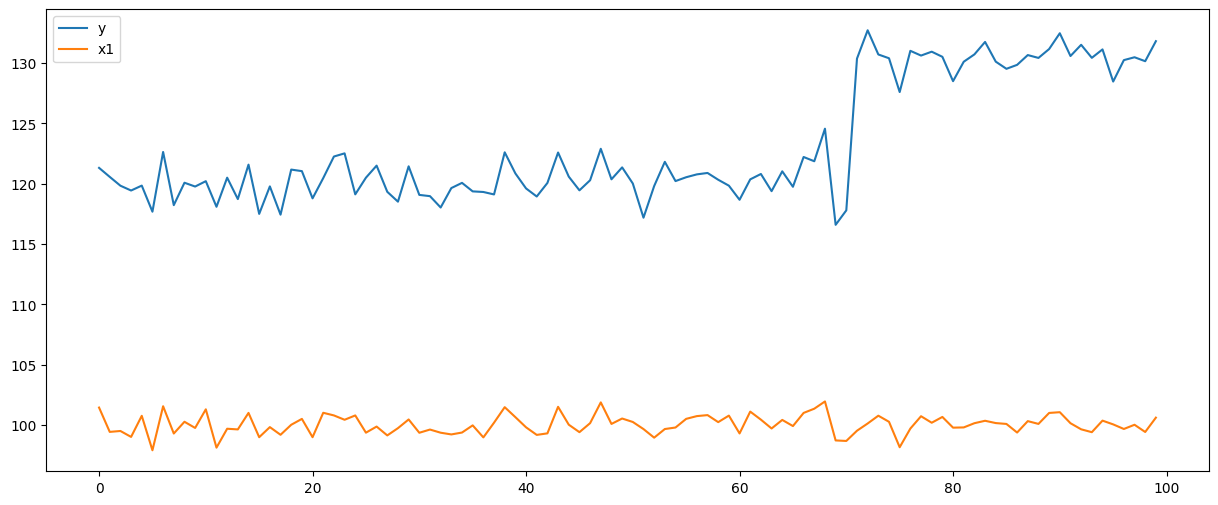

In [4]:
data.plot()

In [5]:
pre_period = [0,69]
post_period = [71,99]

In [6]:
date_range = pd.date_range(start="2014-01-01", periods=100)
ts_data = data.copy()
ts_data.index = date_range
ts_data.head()

,y,x1
2014-01-01,121.308920,101.463374
2014-01-02,120.563149,99.448868
2014-01-03,119.832495,99.524170
2014-01-04,119.433612,99.033362
2014-01-05,119.840664,100.779647


In [17]:
ts_pre_period = [pd.to_datetime(date) for date in ["2014-01-01", "2014-03-12"]]
ts_post_period = [pd.to_datetime(date) for date in ["2014-03-13", "2014-04-10"]]

In [8]:
ts_impact = CausalImpact(ts_data, ts_pre_period, ts_post_period)

c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\optimizer.py:17: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score. The list of unsupported keyword arguments passed include: standardize, nseasons. After release 0.14, this will raise.
  warnings.warn(


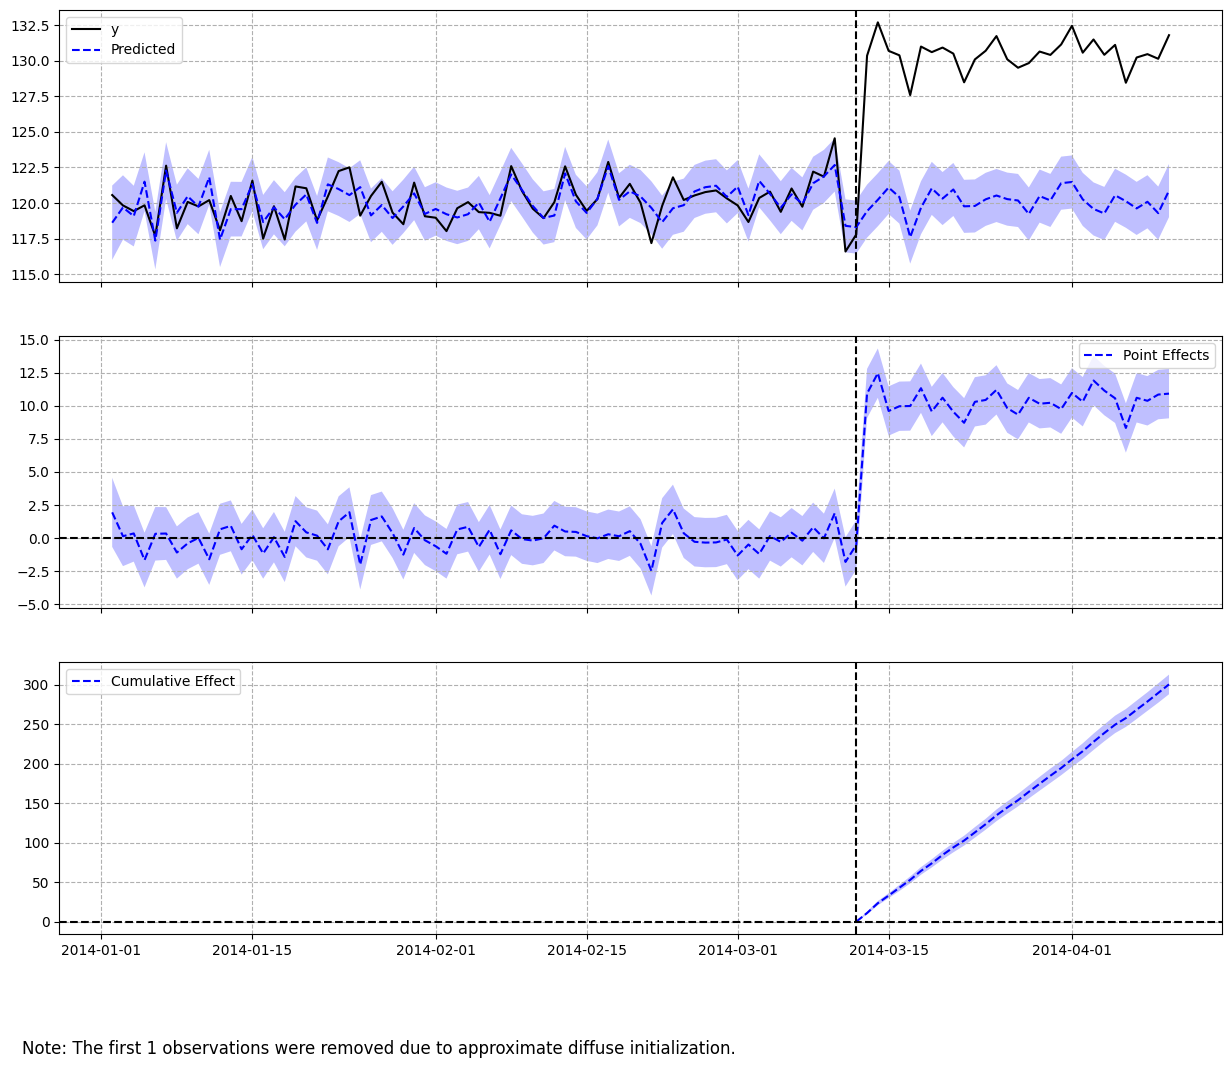

In [9]:
ts_impact.plot()

In [10]:
print(ts_impact.summary())

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    130.5              3784.61
Prediction (s.d.)         120.14 (0.22)      3484.01 (6.36)
95% CI                    [119.71, 120.57]   [3471.66, 3496.59]

Absolute effect (s.d.)    10.37 (0.22)       300.6 (6.36)
95% CI                    [9.93, 10.79]      [288.03, 312.95]

Relative effect (s.d.)    8.63% (0.18%)      8.63% (0.18%)
95% CI                    [8.27%, 8.98%]     [8.27%, 8.98%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))


In [11]:
print(ts_impact.summary(output="report"))

Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 130.5. By contrast, in the absence of an
intervention, we would have expected an average response of 120.14.
The 95% interval of this counterfactual prediction is [119.71, 120.57].
Subtracting this prediction from the observed response yields
an estimate of the causal effect the intervention had on the
response variable. This effect is 10.37 with a 95% interval of
[9.93, 10.79]. For a discussion of the significance of this effect,
see below.


Summing up the individual data points during the post-intervention
period (which can only sometimes be meaningfully interpreted), the
response variable had an overall value of 3784.61.
By contrast, had the intervention not taken place, we would have expected
a sum of 3484.01. The 95% interval of this prediction is [3471.66, 3496.59].


The above results are given in terms of absolute numbers. In relative
terms, the response 

**Análise sem controle x1**

Agora vamos fazer a análise apenas para a variável y, sem a inclusão de controle (x1).

In [12]:
# Criando o DataFrame com apenas a variável y
data2 = pd.DataFrame(y, columns=["y"])

# Definindo os períodos pré e pós-intervenção
pre_period = [0, 69]
post_period = [71, 99]

# Definindo o índice de data
date_range = pd.date_range(start="2014-01-01", periods=100)
ts_data2 = data2.copy()
ts_data2.index = date_range

# Definindo os períodos com datas
ts_pre_period = [pd.to_datetime(date) for date in ["2014-01-01", "2014-03-12"]]
ts_post_period = [pd.to_datetime(date) for date in ["2014-03-13", "2014-04-10"]]


<Axes: >

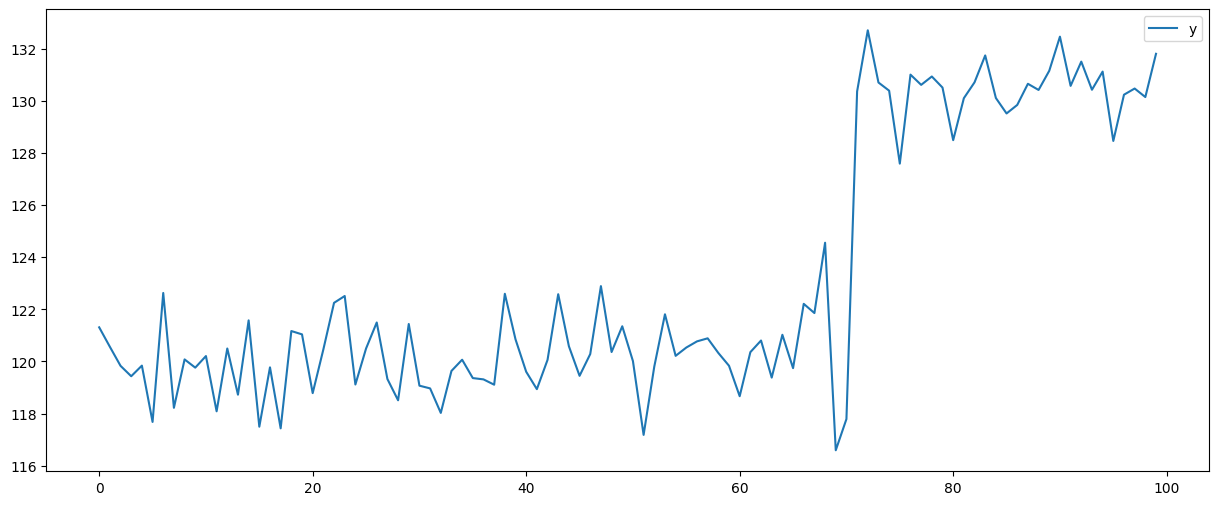

In [13]:
data2.plot()

c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\optimizer.py:17: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score. The list of unsupported keyword arguments passed include: standardize, nseasons. After release 0.14, this will raise.
  warnings.warn(


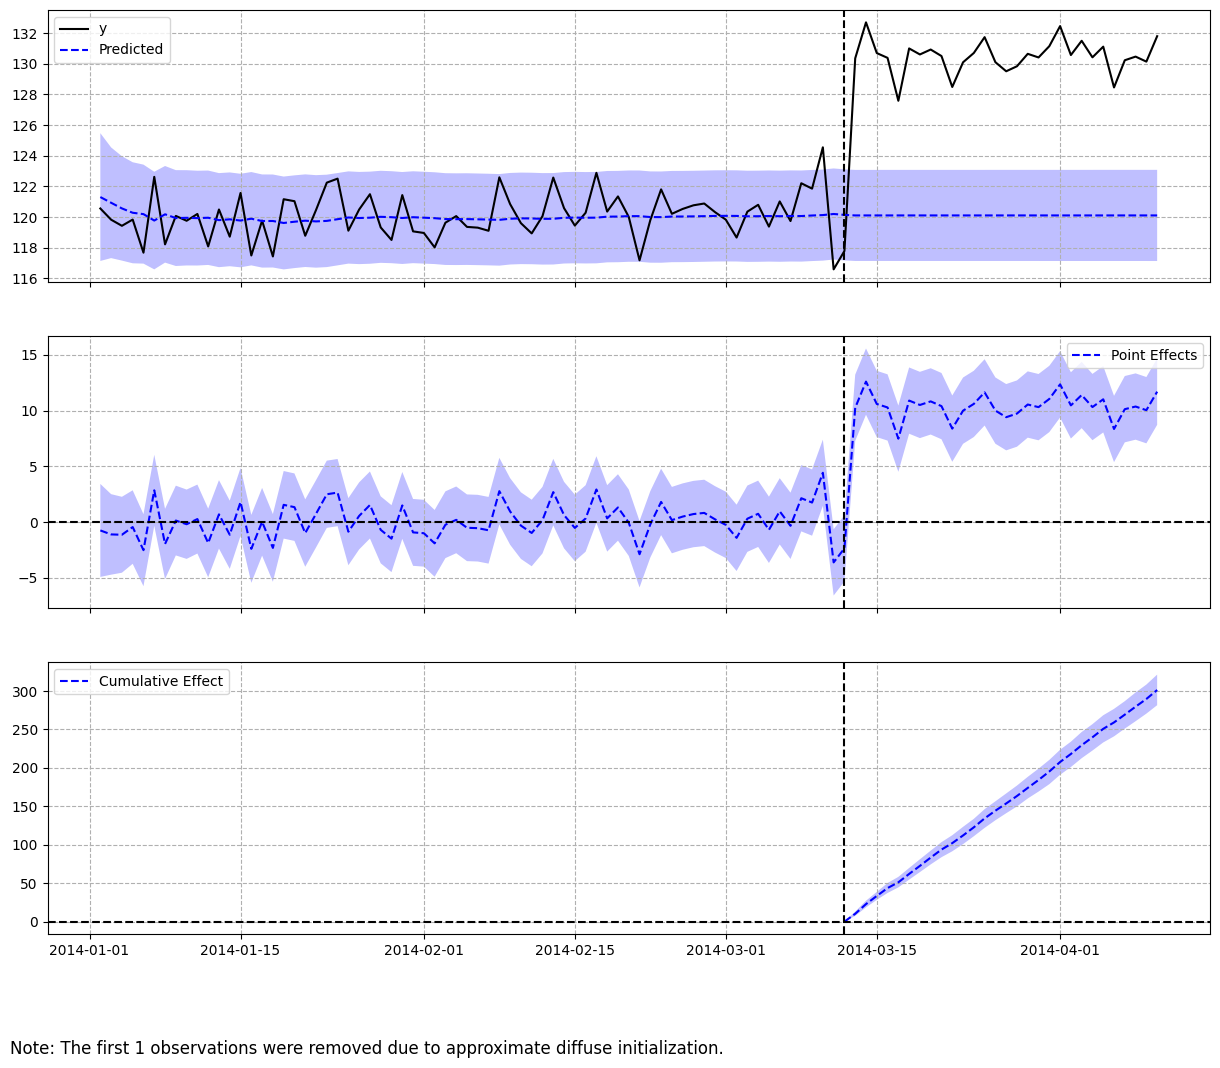

In [19]:
# Rodando o modelo de impacto causal sem a covariável x1
ts_impact2 = CausalImpact(ts_data2, ts_pre_period, ts_post_period)
ts_impact2.plot()

In [20]:
print(ts_impact2.summary())

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    130.5              3784.61
Prediction (s.d.)         120.11 (0.35)      3483.21 (10.16)
95% CI                    [119.42, 120.79]   [3463.18, 3503.0]

Absolute effect (s.d.)    10.39 (0.35)       301.41 (10.16)
95% CI                    [9.71, 11.08]      [281.62, 321.43]

Relative effect (s.d.)    8.65% (0.29%)      8.65% (0.29%)
95% CI                    [8.08%, 9.23%]     [8.08%, 9.23%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))


In [21]:
print(ts_impact2.summary(output="report"))

Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 130.5. By contrast, in the absence of an
intervention, we would have expected an average response of 120.11.
The 95% interval of this counterfactual prediction is [119.42, 120.79].
Subtracting this prediction from the observed response yields
an estimate of the causal effect the intervention had on the
response variable. This effect is 10.39 with a 95% interval of
[9.71, 11.08]. For a discussion of the significance of this effect,
see below.


Summing up the individual data points during the post-intervention
period (which can only sometimes be meaningfully interpreted), the
response variable had an overall value of 3784.61.
By contrast, had the intervention not taken place, we would have expected
a sum of 3483.21. The 95% interval of this prediction is [3463.18, 3503.0].


The above results are given in terms of absolute numbers. In relative
terms, the response v

**Observações** eU QUERO FAZER A ANÁLISE COM CORREÇÃO DE VIÉS PROPOSTA POR badie, A., and J. L'Hour, 2021


synthetic_weights shape: (38,)
mu0_t_X1_pre shape: (19,)
mu0_t_Xj_pre shape: (19,)


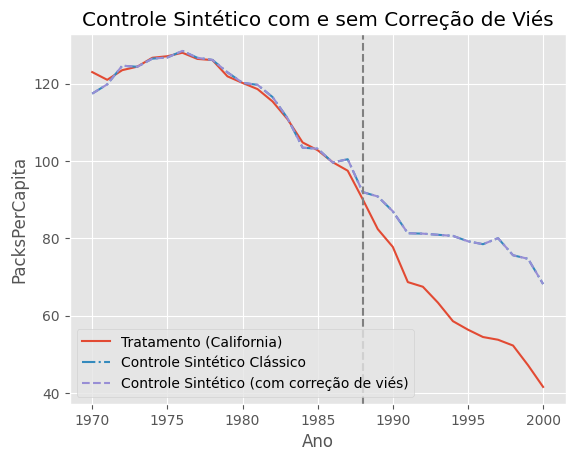

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp
from sklearn.linear_model import LinearRegression

# Carregar dados
df = pd.read_csv("https://github.com/Daniel-Uhr/data/raw/main/california_prop99.csv", delimiter=';')
data = df.pivot(index="Year", columns="State", values="PacksPerCapita")

# Definir períodos pré e pós-intervenção e unidade de tratamento
pre_period = (1970, 1988)
post_period = (1989, 2000)
treatment_unit = "California"
control_units = [unit for unit in data.columns if unit != treatment_unit]

# Extrair dados para os períodos definidos
Y_pre = data.loc[pre_period[0]:pre_period[1], :]
Y_post = data.loc[post_period[0]:post_period[1], :]

# Dados da unidade de tratamento e controle no período pré-intervenção
Y_pre_treatment = Y_pre[treatment_unit].values
Y_pre_control = Y_pre[control_units].values

# Construção do Controle Sintético
W = cp.Variable(Y_pre_control.shape[1])
objective = cp.Minimize(cp.sum_squares(Y_pre_treatment - Y_pre_control @ W))
constraints = [W >= 0, cp.sum(W) == 1]
problem = cp.Problem(objective, constraints)
problem.solve()

# Pesos do controle sintético
synthetic_weights = W.value

# Estimativa do Controle Sintético para o período pós-intervenção
Y_post_control = Y_post[control_units].values
Y_synthetic = Y_post_control @ synthetic_weights

# Controle Sintético Clássico (sem correção de viés)
Y_synthetic_classic = np.concatenate([Y_pre_control @ synthetic_weights, Y_synthetic])

# Correção de Viés
# Passo 1: Estimar um modelo de regressão para µ0,t(x) usando apenas o período pré-intervenção
X_pre = Y_pre_control
Y_pre_all = Y_pre[treatment_unit].values.reshape(-1, 1)

regression_model = LinearRegression()
regression_model.fit(X_pre, Y_pre_all)

# Estimativa µ0_t(X1) para a unidade de tratamento no período pré-intervenção
mu0_t_X1_pre = regression_model.predict(X_pre).flatten()

# Estimativa µ0_t(Xj) para unidades de controle no período pré-intervenção
mu0_t_Xj_pre = regression_model.predict(X_pre).flatten()

# Verificar as formas das matrizes para identificar problemas de dimensão
print("synthetic_weights shape:", synthetic_weights.shape)
print("mu0_t_X1_pre shape:", mu0_t_X1_pre.shape)
print("mu0_t_Xj_pre shape:", mu0_t_Xj_pre.shape)

# Calcular o viés para cada período no intervalo pré-intervenção
# Ajustando a forma do synthetic_weights para multiplicação correta
synthetic_weights_adjusted = synthetic_weights[:len(mu0_t_Xj_pre)]
bias = np.dot(synthetic_weights_adjusted, (mu0_t_Xj_pre - mu0_t_X1_pre))

# Ajustar o controle sintético com a correção de viés
Y_synthetic_corrected = Y_synthetic - bias

# Plotando os resultados
years = data.index
plt.plot(years, data[treatment_unit], label="Tratamento (California)")
plt.plot(years, Y_synthetic_classic, label="Controle Sintético Clássico", linestyle='-.')
plt.plot(years, np.concatenate([Y_pre_control @ synthetic_weights, Y_synthetic_corrected]), label="Controle Sintético (com correção de viés)", linestyle='--')
plt.axvline(x=1988, color='grey', linestyle='--')
plt.xlabel("Ano")
plt.ylabel("PacksPerCapita")
plt.legend()
plt.title("Controle Sintético com e sem Correção de Viés")
plt.show()


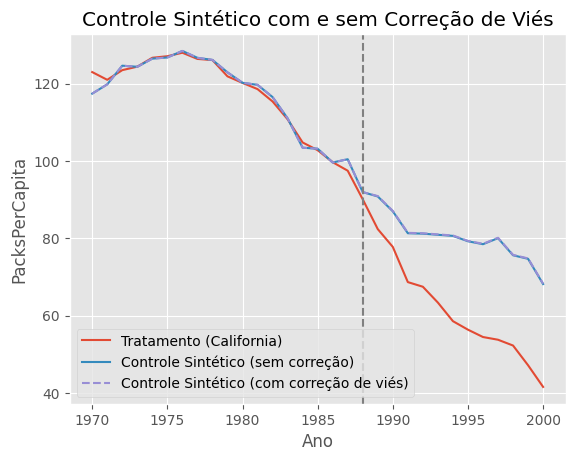

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp

# Carregar dados
df = pd.read_csv("https://github.com/Daniel-Uhr/data/raw/main/california_prop99.csv", delimiter=';')
data = df.pivot(index="Year", columns="State", values="PacksPerCapita")

# Definir períodos pré e pós-intervenção e unidade de tratamento
pre_period = (1970, 1988)
post_period = (1989, 2000)
treatment_unit = "California"
control_units = [unit for unit in data.columns if unit != treatment_unit]

# Extrair dados para os períodos definidos
Y_pre = data.loc[pre_period[0]:pre_period[1], :]
Y_post = data.loc[post_period[0]:post_period[1], :]

# Dados da unidade de tratamento e controle no período pré-intervenção
Y_pre_treatment = Y_pre[treatment_unit].values
Y_pre_control = Y_pre[control_units].values

# Construção do Controle Sintético
W = cp.Variable(Y_pre_control.shape[1])
objective = cp.Minimize(cp.sum_squares(Y_pre_treatment - Y_pre_control @ W))
constraints = [W >= 0, cp.sum(W) == 1]
problem = cp.Problem(objective, constraints)
problem.solve()

# Pesos do controle sintético
synthetic_weights = W.value

# Estimativa do Controle Sintético para o período pós-intervenção
Y_post_control = Y_post[control_units].values
Y_synthetic = Y_post_control @ synthetic_weights

# Correção de Viés
bias = np.mean(Y_pre_treatment - Y_pre_control @ synthetic_weights)
Y_synthetic_corrected = Y_synthetic - bias

# Plotando os resultados
years = data.index
plt.plot(years, data[treatment_unit], label="Tratamento (California)")
plt.plot(years, data[control_units] @ synthetic_weights, label="Controle Sintético (sem correção)")
plt.plot(years, np.concatenate([Y_pre_control @ synthetic_weights, Y_synthetic_corrected]), label="Controle Sintético (com correção de viés)", linestyle='--')
plt.axvline(x=1988, color='grey', linestyle='--')
plt.xlabel("Ano")
plt.ylabel("PacksPerCapita")
plt.legend()
plt.title("Controle Sintético com e sem Correção de Viés")
plt.show()


### Outros métodos para o SCM

* Synthetic Control Method (Abadie & Gardeazabal 2003)
* Robust Synthetic Control Method (Amjad, Shah & Shen 2018)
* Augmented Synthetic Control Method (Ben-Michael, Feller & Rothstein 2021)
* Penalized Synthetic Control Method (Abadie & L'Hour 2021)

`pip install pysyncon`

### Robust Synthetic Control Method (Amjad, Shah & Shen 2018)

In [2]:
import pandas as pd
from pysyncon import Dataprep, RobustSynth

In [3]:
df = pd.read_csv("https://github.com/Daniel-Uhr/data/raw/main/basque.csv")

dataprep = Dataprep(
    foo=df,
    predictors=[
        "school.illit",
        "school.prim",
        "school.med",
        "school.high",
        "school.post.high",
        "invest",
    ],
    predictors_op="mean",
    time_predictors_prior=range(1964, 1970),
    special_predictors=[
        ("gdpcap", range(1960, 1970), "mean"),
        ("sec.agriculture", range(1961, 1970, 2), "mean"),
        ("sec.energy", range(1961, 1970, 2), "mean"),
        ("sec.industry", range(1961, 1970, 2), "mean"),
        ("sec.construction", range(1961, 1970, 2), "mean"),
        ("sec.services.venta", range(1961, 1970, 2), "mean"),
        ("sec.services.nonventa", range(1961, 1970, 2), "mean"),
        ("popdens", [1969], "mean"),
    ],
    dependent="gdpcap",
    unit_variable="regionname",
    time_variable="year",
    treatment_identifier="Basque Country (Pais Vasco)",
    controls_identifier=[
        "Aragon",
        "Baleares (Islas)",
        "Andalucia",
        "Canarias",
        "Cantabria",
        "Castilla Y Leon",
        "Castilla-La Mancha",
        "Cataluna",
        "Comunidad Valenciana",
        "Extremadura",
        "Galicia",
        "Madrid (Comunidad De)",
        "Murcia (Region de)",
        "Navarra (Comunidad Foral De)",
        "Principado De Asturias",
        "Rioja (La)",
        "Spain (Espana)",
    ],
    time_optimize_ssr=range(1960, 1970),
)

robust = RobustSynth()
robust.fit(dataprep, lambda_=0.1, sv_count=2)

In [4]:
robust.weights()

Aragon                          0.037
Baleares (Islas)                0.089
Andalucia                       0.051
Canarias                        0.024
Cantabria                       0.128
Castilla Y Leon                 0.000
Castilla-La Mancha             -0.029
Cataluna                        0.168
Comunidad Valenciana            0.094
Extremadura                    -0.029
Galicia                        -0.004
Madrid (Comunidad De)           0.304
Murcia (Region de)              0.033
Navarra (Comunidad Foral De)    0.036
Principado De Asturias          0.141
Rioja (La)                      0.012
Spain (Espana)                  0.075
Name: weights, dtype: float64

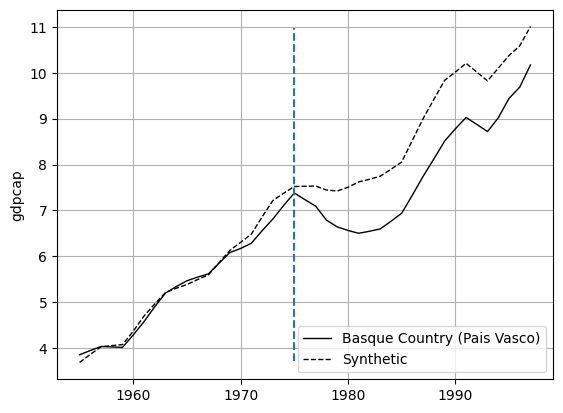

In [5]:
robust.path_plot(time_period=range(1955, 1998), treatment_time=1975)

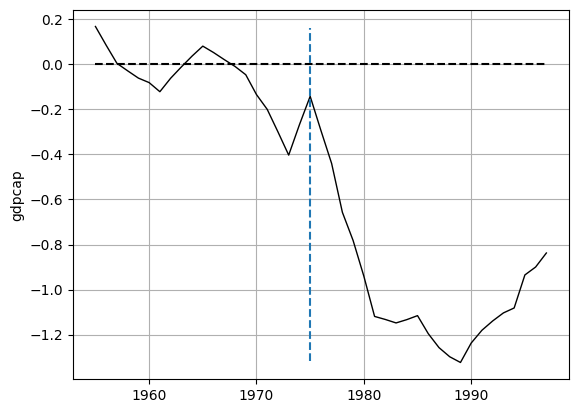

In [6]:
robust.gaps_plot(time_period=range(1955, 1998), treatment_time=1975)

In [24]:
robust.att(time_period=range(1975, 1998))

{'att': -0.9738700861428731, 'se': 0.0667320207981225}

In [7]:
robust.summary()

,treated,synthetic,sample mean
school.illit,39.888,370.122,323.826
school.prim,1031.742,2957.491,2182.453
school.med,90.359,247.817,148.864
school.high,25.728,70.820,47.133
school.post.high,13.480,45.090,26.163
invest,24.647,24.549,21.445
special.1.gdpcap,5.285,5.299,3.584
special.2.sec.agriculture,6.844,11.848,21.058
special.3.sec.energy,4.106,5.676,5.252
special.4.sec.industry,45.082,31.441,22.670


### Augmented Synthetic Control Method (Ben-Michael, Feller & Rothstein 2021)

In [8]:
import pandas as pd
from pysyncon import Dataprep, AugSynth

In [9]:
df = pd.read_csv("https://github.com/Daniel-Uhr/data/raw/main/basque.csv")

dataprep = Dataprep(
    foo=df,
    predictors=[
        "school.illit",
        "school.prim",
        "school.med",
        "school.high",
        "school.post.high",
        "invest",
    ],
    predictors_op="mean",
    time_predictors_prior=range(1964, 1970),
    special_predictors=[
        ("gdpcap", range(1960, 1970), "mean"),
        ("sec.agriculture", range(1961, 1970, 2), "mean"),
        ("sec.energy", range(1961, 1970, 2), "mean"),
        ("sec.industry", range(1961, 1970, 2), "mean"),
        ("sec.construction", range(1961, 1970, 2), "mean"),
        ("sec.services.venta", range(1961, 1970, 2), "mean"),
        ("sec.services.nonventa", range(1961, 1970, 2), "mean"),
        ("popdens", [1969], "mean"),
    ],
    dependent="gdpcap",
    unit_variable="regionname",
    time_variable="year",
    treatment_identifier="Basque Country (Pais Vasco)",
    controls_identifier=[
        "Andalucia",
        "Aragon",
        "Baleares (Islas)",
        "Canarias",
        "Cantabria",
        "Castilla-La Mancha",
        "Castilla Y Leon",
        "Cataluna",
        "Comunidad Valenciana",
        "Extremadura",
        "Galicia",
        "Madrid (Comunidad De)",
        "Murcia (Region de)",
        "Navarra (Comunidad Foral De)",
        "Principado De Asturias",
        "Rioja (La)",
        "Spain (Espana)",
    ],
    time_optimize_ssr=range(1960, 1970),
)

augsynth = AugSynth()
augsynth.fit(dataprep=dataprep)

In [10]:
augsynth.weights()

Andalucia                       0.114
Aragon                          1.775
Baleares (Islas)               -0.713
Canarias                        1.194
Cantabria                       0.498
Castilla-La Mancha              0.132
Castilla Y Leon                -1.406
Cataluna                        1.319
Comunidad Valenciana           -1.731
Extremadura                    -1.134
Galicia                         1.982
Madrid (Comunidad De)           0.111
Murcia (Region de)             -1.315
Navarra (Comunidad Foral De)   -1.303
Principado De Asturias         -0.024
Rioja (La)                      1.590
Spain (Espana)                 -0.086
Name: weights, dtype: float64

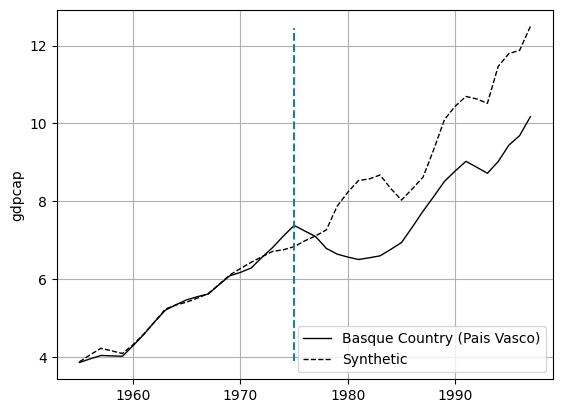

In [11]:
augsynth.path_plot(time_period=range(1955, 1998), treatment_time=1975)

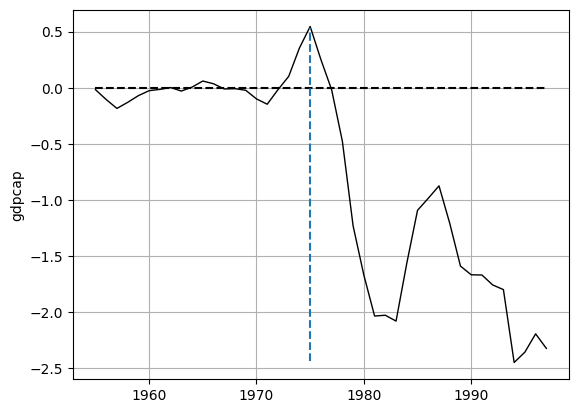

In [12]:
augsynth.gaps_plot(time_period=range(1955, 2000), treatment_time=1975)

In [23]:
augsynth.att(time_period=range(1975, 1998))

{'att': -1.4021009256816717, 'se': 0.17326945464037458}

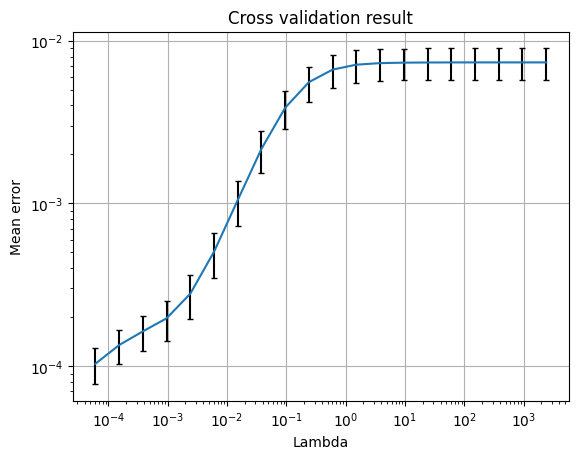

In [13]:
augsynth.cv_result.plot()

In [14]:
augsynth.summary()

,treated,synthetic,sample mean
school.illit,39.888,37.380,323.826
school.prim,1031.742,1085.844,2182.453
school.med,90.359,106.612,148.864
school.high,25.728,23.656,47.133
school.post.high,13.480,11.347,26.163
invest,24.647,24.645,21.445
special.1.gdpcap,5.285,5.286,3.584
special.2.sec.agriculture,6.844,6.850,21.058
special.3.sec.energy,4.106,4.107,5.252
special.4.sec.industry,45.082,45.091,22.670


### Penalized Synthetic Control Method (Abadie & L'Hour 2021)

In [15]:
import pandas as pd
from pysyncon import Dataprep, PenalizedSynth, Synth

In [16]:
df = pd.read_csv("https://github.com/Daniel-Uhr/data/raw/main/basque.csv")

dataprep = Dataprep(
    foo=df,
    predictors=[
        "school.illit",
        "school.prim",
        "school.med",
        "school.high",
        "school.post.high",
        "invest",
    ],
    predictors_op="mean",
    time_predictors_prior=range(1964, 1970),
    special_predictors=[
        ("gdpcap", range(1960, 1970), "mean"),
        ("sec.agriculture", range(1961, 1970, 2), "mean"),
        ("sec.energy", range(1961, 1970, 2), "mean"),
        ("sec.industry", range(1961, 1970, 2), "mean"),
        ("sec.construction", range(1961, 1970, 2), "mean"),
        ("sec.services.venta", range(1961, 1970, 2), "mean"),
        ("sec.services.nonventa", range(1961, 1970, 2), "mean"),
        ("popdens", [1969], "mean"),
    ],
    dependent="gdpcap",
    unit_variable="regionname",
    time_variable="year",
    treatment_identifier="Basque Country (Pais Vasco)",
    controls_identifier=[
        "Aragon",
        "Baleares (Islas)",
        "Andalucia",
        "Canarias",
        "Cantabria",
        "Castilla Y Leon",
        "Castilla-La Mancha",
        "Cataluna",
        "Comunidad Valenciana",
        "Extremadura",
        "Galicia",
        "Madrid (Comunidad De)",
        "Murcia (Region de)",
        "Navarra (Comunidad Foral De)",
        "Principado De Asturias",
        "Rioja (La)",
        "Spain (Espana)",
    ],
    time_optimize_ssr=range(1960, 1970),
)

pen = PenalizedSynth()
pen.fit(dataprep, lambda_=0.01)

In [17]:
pen.weights()

Aragon                          0.000
Baleares (Islas)                0.000
Andalucia                       0.000
Canarias                        0.000
Cantabria                       0.241
Castilla Y Leon                 0.000
Castilla-La Mancha              0.000
Cataluna                        0.759
Comunidad Valenciana            0.000
Extremadura                     0.000
Galicia                         0.000
Madrid (Comunidad De)           0.000
Murcia (Region de)              0.000
Navarra (Comunidad Foral De)    0.000
Principado De Asturias          0.000
Rioja (La)                      0.000
Spain (Espana)                  0.000
Name: weights, dtype: float64

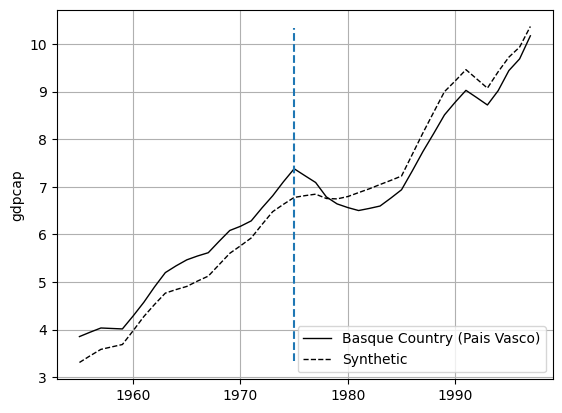

In [18]:
pen.path_plot(time_period=range(1955, 1998), treatment_time=1975)

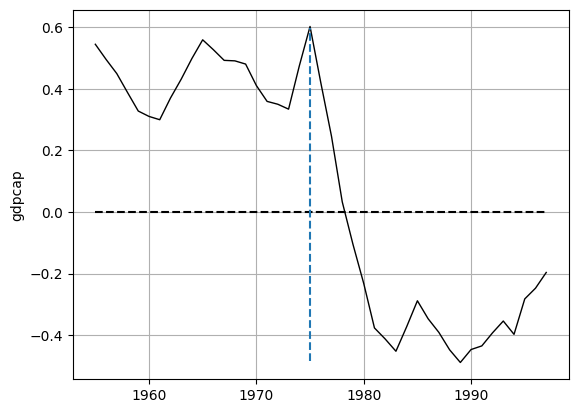

In [19]:
pen.gaps_plot(time_period=range(1955, 1998), treatment_time=1975)

In [20]:
pen.summary()

,treated,synthetic,sample mean
school.illit,39.888,213.304,323.826
school.prim,1031.742,2259.100,2182.453
school.med,90.359,169.182,148.864
school.high,25.728,50.057,47.133
school.post.high,13.480,25.277,26.163
invest,24.647,24.097,21.445
special.1.gdpcap,5.285,4.840,3.584
special.2.sec.agriculture,6.844,9.099,21.058
special.3.sec.energy,4.106,2.883,5.252
special.4.sec.industry,45.082,39.207,22.670


In [22]:
pen.att(time_period=range(1975, 1998))

{'att': -0.6995653288206928, 'se': 0.07078079135011113}

Este método recuperará os pesos do método de controle sintético tradicional se definirmos 𝜆 = 0 e use o apropriado 𝑉 matriz ( Γ matriz na notação do artigo Abadie e L'Hour).

In [21]:
synth = Synth()
synth.fit(dataprep=dataprep)

pen.fit(dataprep=dataprep, lambda_=0.0, custom_V=synth.V)
pen.weights()

Aragon                          0.000
Baleares (Islas)                0.000
Andalucia                       0.000
Canarias                        0.000
Cantabria                       0.000
Castilla Y Leon                 0.000
Castilla-La Mancha              0.000
Cataluna                        0.851
Comunidad Valenciana            0.000
Extremadura                     0.000
Galicia                         0.000
Madrid (Comunidad De)           0.149
Murcia (Region de)              0.000
Navarra (Comunidad Foral De)    0.000
Principado De Asturias          0.000
Rioja (La)                      0.000
Spain (Espana)                  0.000
Name: weights, dtype: float64